In [646]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm, skew

import seaborn as sns
color=sns.color_palette()
sns.set_style('darkgrid')

from sklearn.model_selection import KFold

import os
import csv
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, Lasso
from sklearn.impute import MissingIndicator
import glob
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

from sklearn.metrics import roc_curve, auc

from os import listdir
from os.path import isfile, join
import statistics 

In [647]:
train_data = pd.read_csv('training_data.csv')

train_data.head(10).transpose()

C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6,54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7,8,9
PolicyNo,348311307,380734900,268623319,311021610,372163700,351656004,368367501,342065905,215755422,216358422
Policy_Company,Preferred,Standard,Standard,Standard,Preferred,Standard,Standard,Standard,Standard,Standard
Policy_Installment_Term,6,6,6,6,6,6,6,6,6,6
Policy_Billing_Code,Direct Billed to Insured,Direct Billed to Insured,Direct Billed to Insured,Direct Billed to Insured,Direct Billed to Insured,Direct Billed to Insured,Direct Billed to Insured,Direct Billed to Insured,Direct Billed to Insured,Direct Billed to Insured
Policy_Method_Of_Payment,Installment,Installment,Pre-paid,Pre-paid,Installment,Pre-paid,Installment,Pre-paid,Pre-paid,Pre-paid
Policy_Reinstatement_Fee_Indicator,N,N,N,N,N,N,Y,N,N,N
Policy_Zip_Code_Garaging_Location,43375,42874,42801,43399,42875,44054,42468,43993,42876,43749
Vehicle_Territory,26,30,31,31,30,31,35,31,35,20
Vehicle_Make_Year,1986,1999,1996,1967,1994,1993,1997,2003,1985,1990
Vehicle_Make_Description,TYTA PICKUP,MERC COUGAR,BUIK REGAL CU,FORD F100 PU,CHEV LUMINAEURO,CHEV S10 BLAZER,SATN SL2,DODG DAKOTA SPT,DODG 150,CHEV LUMINAEURO


In [648]:
#Dropping unnecessary features from data 
temp=train_data.drop(['PolicyNo','Vehicle_Make_Description','Policy_Zip_Code_Garaging_Location','Vehicle_Annual_Miles','Claim_Count','Frequency','Severity','EEA_PolicyYear','EEA_Policy_Zip_Code_3'],axis=1)
train_data_one=pd.get_dummies(data=temp)
train_data_one.shape

(424422, 108)

In [92]:
#Identifying the correlated features to drop from dataset
def correlation(data, threshold):
    corr_col=set()
    corr_matrix=data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                corr_col.add(colname)
    return corr_col
corr_features=correlation(train_data_one,0.8)
print('Correlated features:', len(set(corr_features)))
train_data_uncorr=train_data_one.drop(labels=corr_features,axis=1)
train_data_uncorr.shape

Correlated features: 32


(424422, 76)

In [650]:
corr_features

{'Driver_Maximum_Age',
 'Driver_Total_Female',
 'Driver_Total_Licensed_In_State',
 'EEA_Full_Coverage_Indicator_N',
 'EEA_Full_Coverage_Indicator_Y',
 'EEA_Liability_Coverage_Only_Indicator_Y',
 'EEA_Multi_Auto_Policies_Indicator_Y',
 'EEA_Packaged_Policy_Indicator_Y',
 'EEA_Prior_Bodily_Injury_Limit_100-200',
 'EEA_Prior_Bodily_Injury_Limit_100-400',
 'EEA_Prior_Bodily_Injury_Limit_20-50',
 'EEA_Prior_Bodily_Injury_Limit_200-400',
 'EEA_Prior_Bodily_Injury_Limit_300-300',
 'EEA_Prior_Bodily_Injury_Limit_40-100 ',
 'EEA_Prior_Bodily_Injury_Limit_75-300',
 'EEA_Prior_Bodily_Injury_Limit_750-750',
 'Policy_Billing_Code_Premium Finance',
 'Policy_Company_Standard ',
 'Policy_Method_Of_Payment_Pre-paid',
 'Policy_Reinstatement_Fee_Indicator_Y',
 'SYS_New_Business_Y',
 'SYS_Renewed_Y',
 'Vehicle_Anti_Theft_Device_Passive Disabling-Vehicle Recovery',
 'Vehicle_Collision_Coverage_Indicator_N',
 'Vehicle_Collision_Coverage_Indicator_Y',
 'Vehicle_Comprehensive_Coverage_Indicator_Y',
 'Vehicle_

In [93]:
#The feature list that does not correlate are as listed
train_data_uncorr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424422 entries, 0 to 424421
Data columns (total 76 columns):
Policy_Installment_Term                                                    424422 non-null int64
Vehicle_Territory                                                          424422 non-null int64
Vehicle_Make_Year                                                          424422 non-null int64
Vehicle_New_Cost_Amount                                                    424422 non-null int64
Vehicle_Symbol                                                             424422 non-null int64
Vehicle_Number_Of_Drivers_Assigned                                         424422 non-null int64
Vehicle_Miles_To_Work                                                      424422 non-null int64
Vehicle_Days_Per_Week_Driven                                               424422 non-null int64
Vehicle_Age_In_Years                                                       424422 non-null int64
Vehicle_Med_Pay_

In [9]:
pd.options.display.max_rows = 4000

(array([4.23971e+05, 3.06000e+02, 7.20000e+01, 4.60000e+01, 1.30000e+01,
        3.00000e+00, 4.00000e+00, 3.00000e+00, 1.00000e+00, 3.00000e+00]),
 array([     0.,  32700.,  65400.,  98100., 130800., 163500., 196200.,
        228900., 261600., 294300., 327000.]),
 <a list of 10 Patch objects>)

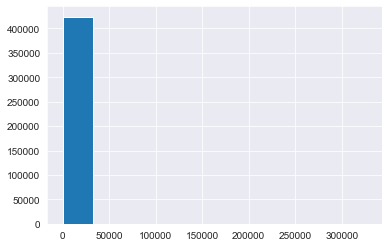

In [94]:
# Histogram of Loss_Amount

plt.hist(train_data['Loss_Amount'])

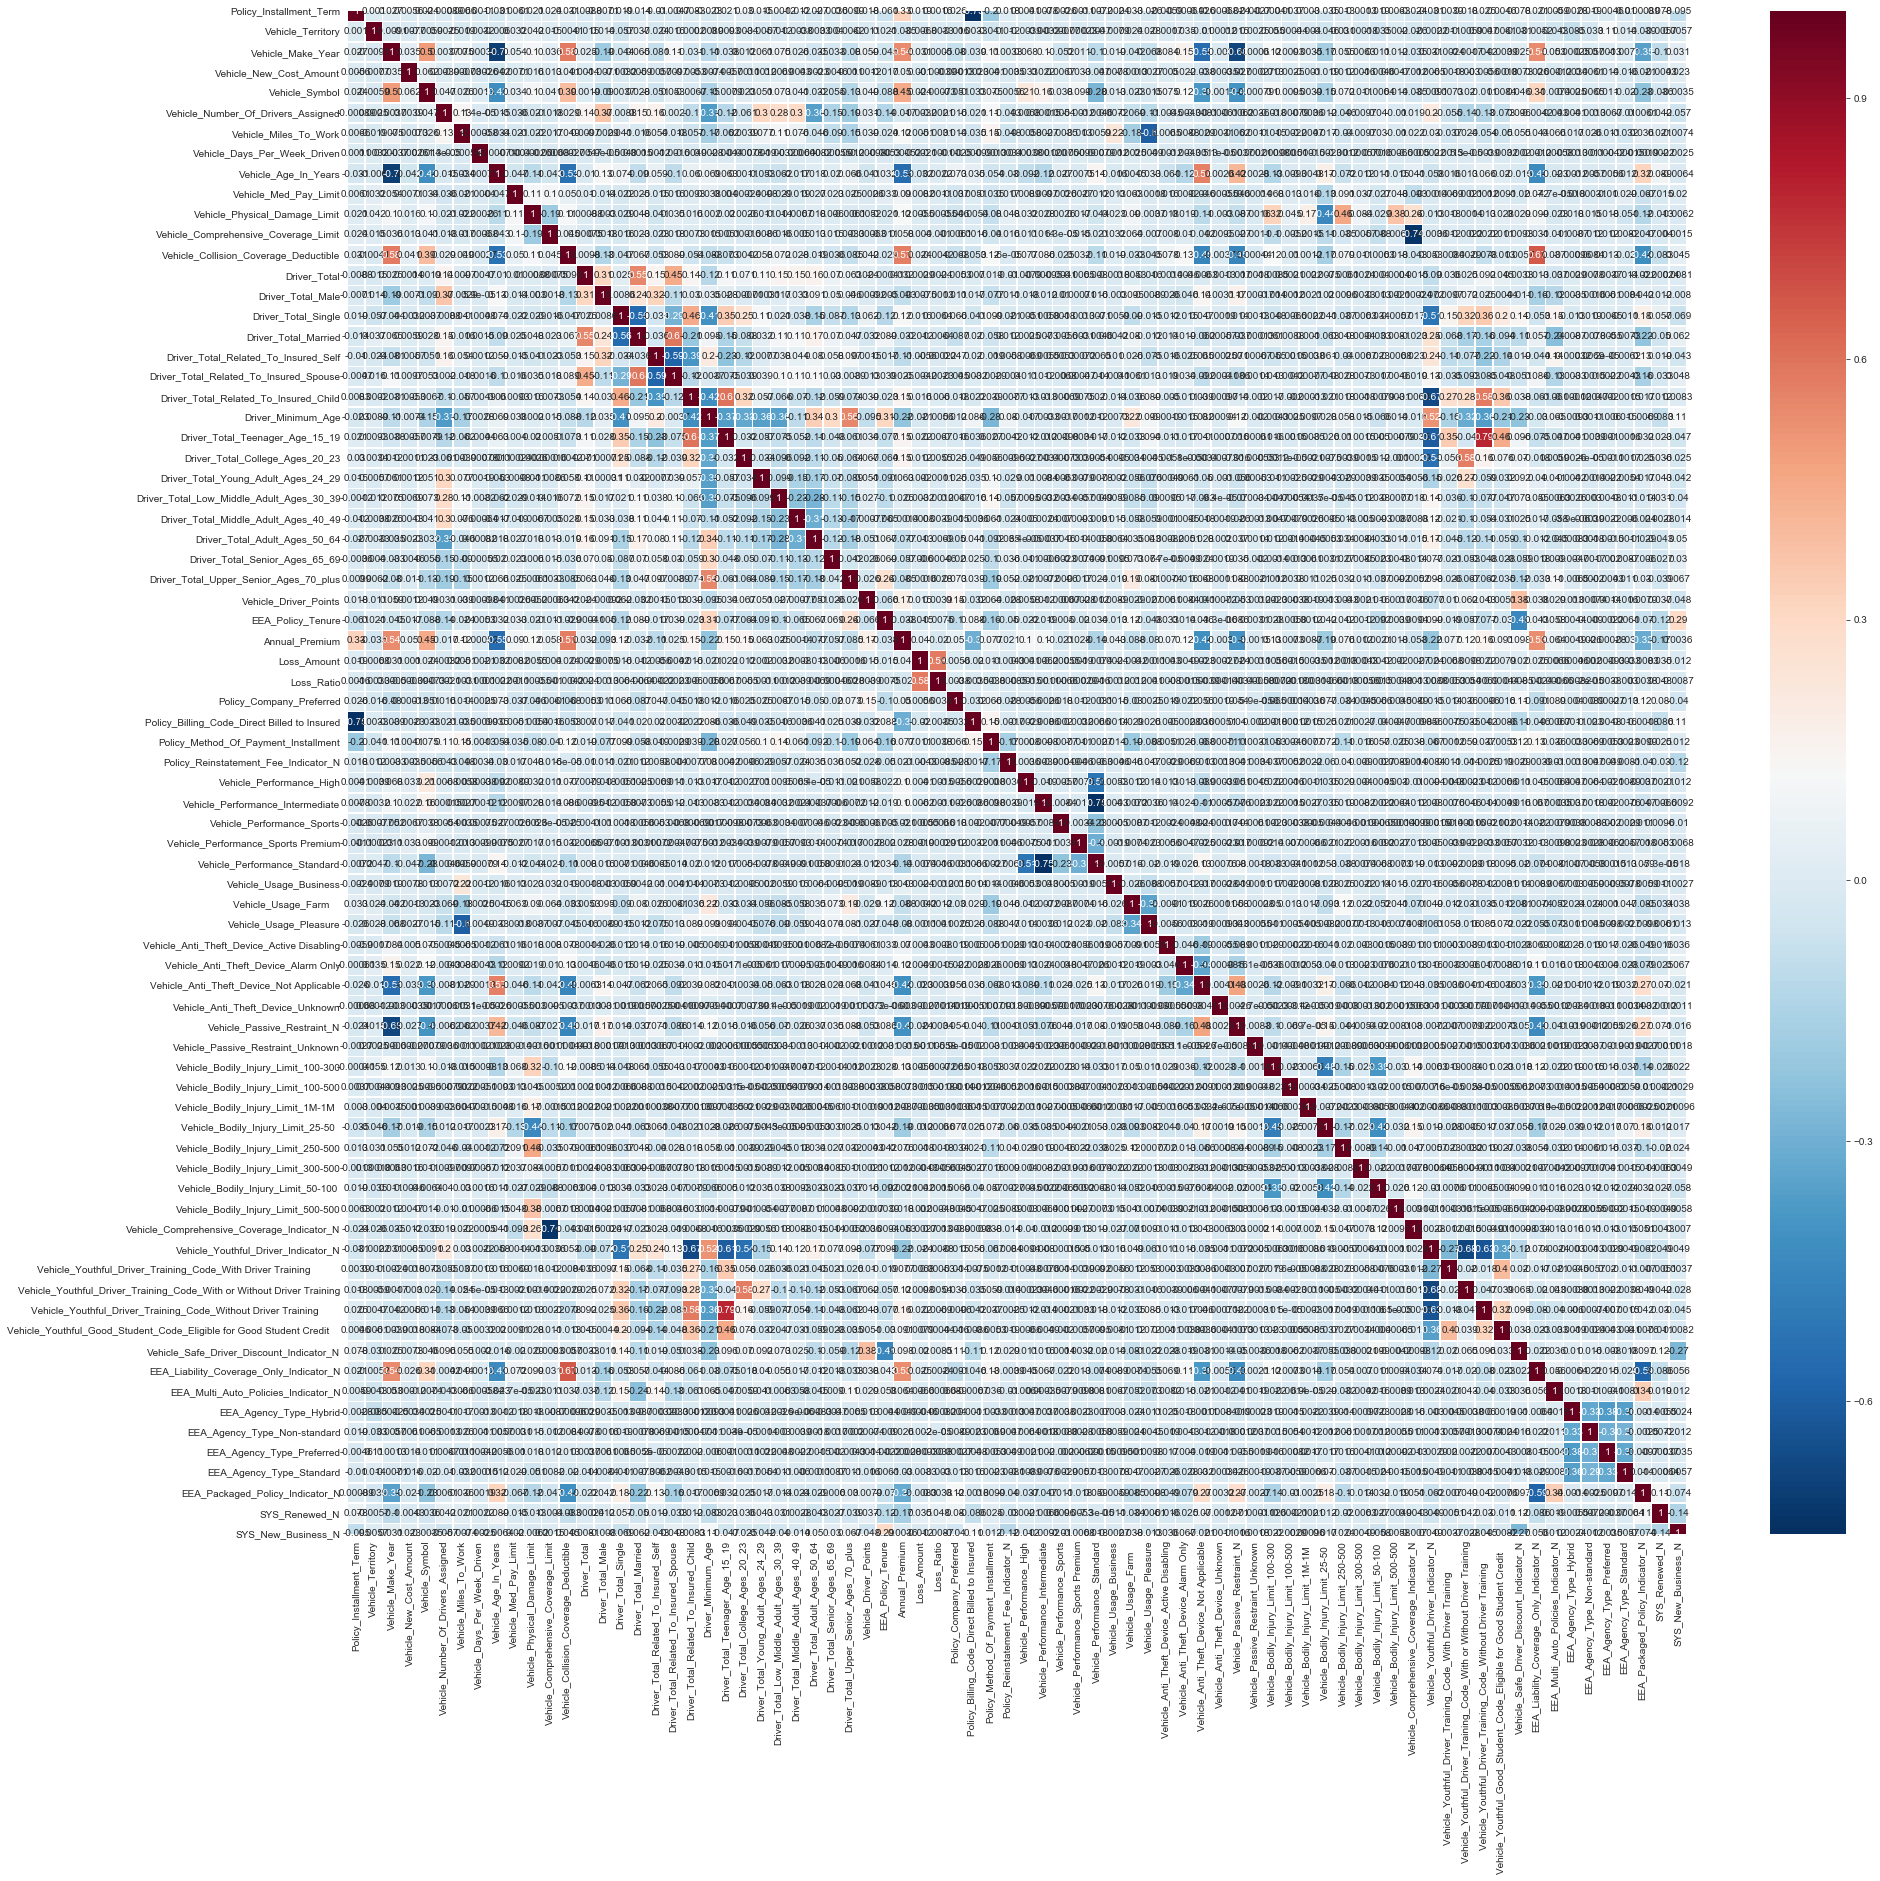

In [99]:
pearsoncorr = train_data_uncorr.corr(method='pearson')
f, ax = plt.subplots(figsize=(30,28))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [102]:
#Dropping unnecessary features after Correlation
train_data=train_data.drop(['PolicyNo','Policy_Zip_Code_Garaging_Location','Vehicle_Make_Year','Vehicle_Make_Description','Vehicle_Annual_Miles','Driver_Total_Licensed_In_State','EEA_Policy_Zip_Code_3','EEA_Full_Coverage_Indicator','EEA_Prior_Bodily_Injury_Limit','EEA_PolicyYear','Claim_Count','Frequency','Severity'],axis=1)

In [103]:
print(train_data.describe())

       Policy_Installment_Term  Vehicle_Territory  Vehicle_New_Cost_Amount  \
count            424422.000000      424422.000000            424422.000000   
mean                  6.224706          31.051666               290.340136   
std                   1.139186           4.186652              2876.649246   
min                   6.000000          13.000000                -1.000000   
25%                   6.000000          30.000000                -1.000000   
50%                   6.000000          31.000000                -1.000000   
75%                   6.000000          35.000000                -1.000000   
max                  12.000000          37.000000             99999.000000   

       Vehicle_Symbol  Vehicle_Number_Of_Drivers_Assigned  \
count   424422.000000                       424422.000000   
mean        11.192344                           28.397668   
std          4.007121                           43.952752   
min         -1.000000                            1.00

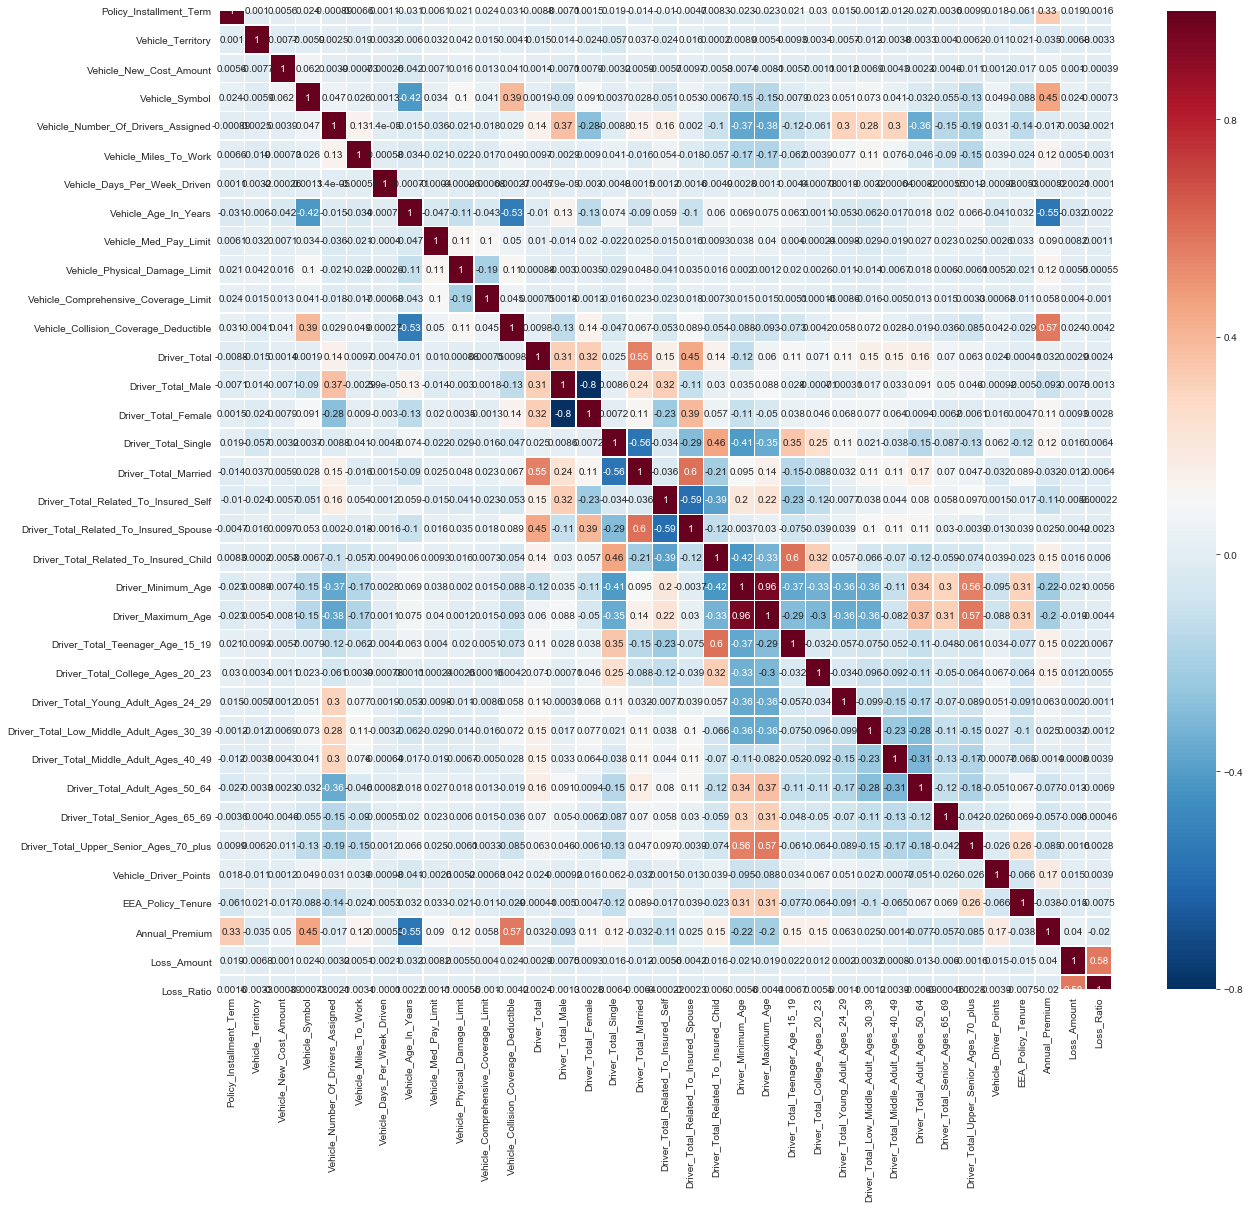

In [105]:
#train_data.corr(method='pearson').unstack().sort_values()
pearsoncorr = train_data.corr(method='pearson')
f, ax = plt.subplots(figsize=(20,18))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [106]:
# replace 99 with 0 value
train_data['Vehicle_Number_Of_Drivers_Assigned'].replace(99,0,inplace=True)

In [693]:
#g=sns.pairplot(train_data.sample(1000))

In [107]:
train_data_onehot=pd.get_dummies(data=train_data)

In [108]:
#pearsoncorr = train_data_onehot.corr(method='pearson')
#f, ax = plt.subplots(figsize=(40,36))
#sns.heatmap(pearsoncorr, 
#            xticklabels=pearsoncorr.columns,
#            yticklabels=pearsoncorr.columns,
#            cmap='RdBu_r',
#            annot=True, 
#            linewidth=0.7)

In [109]:
# Partitioning Dataset with only non zero Loss_Amount values 
train_data_with_loss=train_data_onehot[train_data['Loss_Amount'] != 0]

In [110]:
# Partitioning Dataset with all the zero Loss_Amount values 
train_data_with_no_loss=train_data_onehot[train_data['Loss_Amount'] == 0]
#train_data_with_no_loss.head(10)
#train_data_with_no_loss=pd.get_dummies(data=train_data_with_no_loss)

In [111]:
print(train_data_with_loss.shape)
print(train_data_with_no_loss.shape)

(18860, 96)
(405562, 96)


In [423]:
#Creating Random portfolio files with a percentage of loss values
no_train = int(train_data_with_loss.shape[0])
no_train=round(no_train/150)
df_names=[]
while no_train > 0:
    #print(no_train)
    rows = np.random.choice(train_data_with_loss.index.values, 150, replace=False)
    df1 = train_data_with_loss.ix[rows]
    rows = np.random.choice(train_data_with_no_loss.index.values, 2850, replace=False)
    df1 = df1.append(train_data_with_no_loss.ix[rows])
    filename="Portfolio_" + str(no_train) + ".csv"
    path='D:\\2020_Spring_training_portfolios\\'
    df1.to_csv(os.path.join(path,filename),index=False)
    no_train =no_train-1
print("========Training Portfolio Files Created===========")

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


========Training Portfolio Files Created===========


In [424]:
# Merging all Training Portfolios into one Training data file
path = 'D:\\2020_Spring_training_portfolios\\' 
all_files = glob.glob(path + "/*.csv")
#print(all_files)

COLUMN_NAMES=['Vehicle_New_Cost_Amount_negative1s', 'Vehicle_New_Cost_Amount_mean', 'Vehicle_Symbol_mean', 'Vehicle_Miles_To_Work_negative1s', 
              'Vehicle_Miles_To_Work_mean', 'Vehicle_Age_In_Years_mean','Vehicle_Med_Pay_Limit_negative1s', 'Vehicle_Med_Pay_Limit_mean', 
              'Vehicle_Physical_Damage_Limit_negative1s', 'Vehicle_Physical_Damage_Limit_mean', 'Vehicle_Comprehensive_Coverage_Limit_negative1s', 
              'Vehicle_Comprehensive_Coverage_Limit_mean', 'Vehicle_Collision_Coverage_Deductible_negative1s', 'Vehicle_Collision_Coverage_Deductible_mean', 
              'Driver_Minimum_Age_mean'
              ,'Driver_Total_Teenager_Age_15_19_1s',
              'Vehicle_Driver_Points_mean', 'Annual_Premium_mean', 'Vehicle_Usage_Business_1s',
              'Vehicle_Usage_Farm_1s', 
              'Vehicle_Usage_Pleasure_1s', 
              'Vehicle_Usage_Work_1s', 
              'Vehicle_Anti_Theft_Device_Active_Disabling_1s', 
              'Vehicle_Anti_Theft_Device_Alarm_Only_1s', 
              'Vehicle_Anti_Theft_Device_Not_Applicable_1s', 
              'Vehicle_Anti_Theft_Device_Passive_Disabling-Vehicle_Recovery_1s', 
              'Vehicle_Anti_Theft_Device_Unknown_1s', 
              'Vehicle_Passive_Restraint_N_1s', 
              'Vehicle_Passive_Restraint_Unknown_1s', 
              'Vehicle_Passive_Restraint_Y_1s', 
              'Vehicle_Bodily_Injury_Limit_100-300_1s', 
              'Vehicle_Bodily_Injury_Limit_100-500_1s','Vehicle_Bodily_Injury_Limit_1M-1M_1s', 
              'Vehicle_Bodily_Injury_Limit_25-50_1s', 'Vehicle_Bodily_Injury_Limit_250-500_1s', 
              'Vehicle_Bodily_Injury_Limit_300-500_1s', 
              'Vehicle_Bodily_Injury_Limit_50-100 _1s','Vehicle_Bodily_Injury_Limit_500-500_1s', 
              'Vehicle_Collision_Coverage_Indicator_N_1s', 
              'Vehicle_Collision_Coverage_Indicator_Y_1s',
              'Vehicle_Safe_Driver_Discount_Indicator_N_1s',
              'Vehicle_Safe_Driver_Discount_Indicator_Y_1s', 'Vehicle_Youthful_Driver_Indicator_N_1s', 'Vehicle_Youthful_Driver_Indicator_Y_1s',
              'Log_Loss_Ratio','Driver_Total_Married_mean',
                'SYS_Renewed_Y_1s',
                'SYS_Renewed_N_1s',
                 'Policy_Method_Of_Payment_Pre-paid_1s',
              'EEA_Policy_Tenure_mean',
             'SYS_New_Business_Y_1s',
               'SYS_New_Business_N_1s','Vehicle_Number_Of_Drivers_Assigned_mean',
               'Policy_Company_Standard_1s',
                'Policy_Company_Preferred_1s'
             ,'Policy_Installment_Term','Vehicle_Territory_mode',
              'Driver_Total_mean',
              'Driver_Total_Male_mean','Driver_Total_Female_mean',
                'Driver_Total_Single_mean',
             'Driver_Total_Related_To_Insured_Self_mean',
              'Driver_Total_Related_To_Insured_Spouse_mean','Driver_Total_Related_To_Insured_Child_mean',
               'Driver_Total_Teenager_Age_15_19_mean',
               'Driver_Total_College_Ages_20_23_mean','Driver_Total_Young_Adult_Ages_24_29_mean'
              ,'Driver_Total_Low_Middle_Adult_Ages_30_39_mean','Driver_Total_Middle_Adult_Ages_40_49_mean','Driver_Total_Adult_Ages_50_64_mean','Driver_Total_Senior_Ages_65_69_mean',
              'Driver_Total_Upper_Senior_Ages_70_plus_mean','Policy_Billing_Code_Direct_Billed_to_Insured_1s',
              'Policy_Method_Of_Payment_Installment_1s',
              'Policy_Reinstatement_Fee_Indicator_N_1s','Vehicle_Performance_High_1s',
             'Vehicle_Performance_Intermediate_1s','Vehicle_Performance_Sports_1s','Vehicle_Performance_Sports_Premium_1s','Vehicle_Performance__Standard_1s',
             'Vehicle_Youthful_Driver_Training_Code_With_Driver_Training_1s','Vehicle_Youthful_Driver_Training_Code_With_or_Without_Driver_Training_1s','Vehicle_Youthful_Driver_Training_Code_Without_Driver_Training_1s',
            'Vehicle_Youthful_Good_Student_Code_Eligible_for_Good_Student_Credit_1s','EEA_Liability_Coverage_Only_Indicator_N_1s','EEA_Multi_Auto_Policies_Indicator_N_1s',
                'EEA_Agency_Type_Hybrid_1s',
             'EEA_Agency_Type_Non-standard_1s','EEA_Agency_Type_Preferred_1s','EEA_Agency_Type_Standard_1s','EEA_Packaged_Policy_Indicator_N_1s','Vehicle_Days_Per_Week_Driven_mean']
training_data= pd.DataFrame(columns = COLUMN_NAMES)
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    #z = np.abs(stats.zscore(df))
    #print(z)
    #df = df[(z < 3).all(axis=1)]
    total_rows= df.shape[0]
    #print(df.shape)
    #temp_df = pd.DataFrame(columns = COLUMN_NAMES)
    temp_dict=(pd.DataFrame(columns = COLUMN_NAMES)).to_dict()
    for col in df.columns:
        if col == 'Policy_Installment_Term':
            temp_dict['Policy_Installment_Term']= df['Policy_Installment_Term'].median()
        if col == 'Policy_Billing_Code_Direct Billed to Insured':
            seriesObj = df.apply(lambda x: True if x['Policy_Billing_Code_Direct Billed to Insured'] == 1 else False , axis=1)
            temp_dict['Policy_Billing_Code_Direct_Billed_to_Insured_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Policy_Method_Of_Payment_Installment':
            seriesObj = df.apply(lambda x: True if x['Policy_Method_Of_Payment_Installment'] == 1 else False , axis=1)
            temp_dict['Policy_Method_Of_Payment_Installment_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Policy_Reinstatement_Fee_Indicator_N':
            seriesObj = df.apply(lambda x: True if x['Policy_Reinstatement_Fee_Indicator_N'] == 1 else False , axis=1)
            temp_dict['Policy_Reinstatement_Fee_Indicator_N_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Performance_High':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Performance_High'] == 1 else False , axis=1)
            temp_dict['Vehicle_Performance_High_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Performance_Intermediate':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Performance_Intermediate'] == 1 else False , axis=1)
            temp_dict['Vehicle_Performance_Intermediate_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Performance_Sports':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Performance_Sports'] == 1 else False , axis=1)
            temp_dict['Vehicle_Performance_Sports_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Performance_Standard':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Performance_Standard'] == 1 else False , axis=1)
            temp_dict['Vehicle_Performance_Standard_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Performance_Sports Premium':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Performance_Sports Premium'] == 1 else False , axis=1)
            temp_dict['Vehicle_Performance_Sports_Premium_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Youthful_Driver_Training_Code_With Driver Training           ':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Youthful_Driver_Training_Code_With Driver Training           '] == 1 else False , axis=1)
            temp_dict['Vehicle_Youthful_Driver_Training_Code_With_Driver_Training_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Youthful_Driver_Training_Code_With or Without Driver Training':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Youthful_Driver_Training_Code_With or Without Driver Training'] == 1 else False , axis=1)
            temp_dict['Vehicle_Youthful_Driver_Training_Code_With_or_Without_Driver_Training_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Youthful_Driver_Training_Code_Without Driver Training        ':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Youthful_Driver_Training_Code_Without Driver Training        '] == 1 else False , axis=1)
            temp_dict['Vehicle_Youthful_Driver_Training_Code_Without_Driver_Training_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Youthful_Good_Student_Code_Eligible for Good Student Credit    ':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Youthful_Good_Student_Code_Eligible for Good Student Credit    '] == 1 else False , axis=1)
            temp_dict['Vehicle_Youthful_Good_Student_Code_Eligible_for_Good_Student_Credit_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'EEA_Liability_Coverage_Only_Indicator_N':
            seriesObj = df.apply(lambda x: True if x['EEA_Liability_Coverage_Only_Indicator_N'] == 1 else False , axis=1)
            temp_dict['EEA_Liability_Coverage_Only_Indicator_N_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'EEA_Multi_Auto_Policies_Indicator_N':
            seriesObj = df.apply(lambda x: True if x['EEA_Multi_Auto_Policies_Indicator_N'] == 1 else False , axis=1)
            temp_dict['EEA_Multi_Auto_Policies_Indicator_N_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'EEA_Agency_Type_Hybrid':
            seriesObj = df.apply(lambda x: True if x['EEA_Agency_Type_Hybrid'] == 1 else False , axis=1)
            temp_dict['EEA_Agency_Type_Hybrid_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'EEA_Packaged_Policy_Indicator_N':
            seriesObj = df.apply(lambda x: True if x['EEA_Packaged_Policy_Indicator_N'] == 1 else False , axis=1)
            temp_dict['EEA_Packaged_Policy_Indicator_N_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Territory':
            temp_dict['Vehicle_Territory_mode']= df['Vehicle_Territory'].mode()[0]
        if col == 'Vehicle_New_Cost_Amount':
            seriesObj = df.apply(lambda x: True if x['Vehicle_New_Cost_Amount'] == -1 else False , axis=1)
            temp_dict['Vehicle_New_Cost_Amount_negative1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
            x1 = df[df['Vehicle_New_Cost_Amount']!= -1]
            temp_dict['Vehicle_New_Cost_Amount_mean']= x1['Vehicle_New_Cost_Amount'].mean()
        if col == 'Vehicle_Symbol':
            temp_dict['Vehicle_Symbol_mean']= df['Vehicle_Symbol'].mode()[0]
        if col == 'Vehicle_Miles_To_Work':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Miles_To_Work'] == -1 else False , axis=1)
            temp_dict['Vehicle_Miles_To_Work_negative1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
            x2 = df[df['Vehicle_Miles_To_Work']!= -1]
            temp_dict['Vehicle_Miles_To_Work_mean']= x2['Vehicle_Miles_To_Work'].mean()
            #print(x2['Vehicle_Miles_To_Work'].mean())
        if col == 'Vehicle_Age_In_Years':
            temp_dict['Vehicle_Age_In_Years_mean']= df['Vehicle_Age_In_Years'].mean()
        if col == 'Vehicle_Med_Pay_Limit':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Med_Pay_Limit'] == -1 else False , axis=1)
            temp_dict['Vehicle_Med_Pay_Limit_negative1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
            x2 = df[df['Vehicle_Med_Pay_Limit']!= -1]
            temp_dict['Vehicle_Med_Pay_Limit_mean']= x2['Vehicle_Med_Pay_Limit'].median()
        if col == 'Vehicle_Physical_Damage_Limit':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Physical_Damage_Limit'] == -1 else False , axis=1)
            temp_dict['Vehicle_Physical_Damage_Limit_negative1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
            x2 = df[df['Vehicle_Physical_Damage_Limit']!= -1]
            temp_dict['Vehicle_Physical_Damage_Limit_mean']= x2['Vehicle_Physical_Damage_Limit'].mean()
        if col == 'Vehicle_Comprehensive_Coverage_Limit':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Comprehensive_Coverage_Limit'] == -1 else False , axis=1)
            temp_dict['Vehicle_Comprehensive_Coverage_Limit_negative1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
            x2 = df[df['Vehicle_Comprehensive_Coverage_Limit']!= -1]
            temp_dict['Vehicle_Comprehensive_Coverage_Limit_mean']= x2['Vehicle_Comprehensive_Coverage_Limit'].mean()   
        if col == 'Vehicle_Collision_Coverage_Deductible':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Collision_Coverage_Deductible'] == -1 else False , axis=1)
            temp_dict['Vehicle_Collision_Coverage_Deductible_negative1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
            x2 = df[df['Vehicle_Collision_Coverage_Deductible']!= -1]
            temp_dict['Vehicle_Collision_Coverage_Deductible_mean']= x2['Vehicle_Collision_Coverage_Deductible'].mean() 
        if col == 'Vehicle_Driver_Points':
            temp_dict['Vehicle_Driver_Points_mean']= df['Vehicle_Driver_Points'].mean()
        if col == 'Annual_Premium':
            temp_dict['Annual_Premium_mean']= df['Annual_Premium'].mean()
        if col == 'Driver_Minimum_Age':
            temp_dict['Driver_Minimum_Age_mean']= df['Driver_Minimum_Age'].mode()[0]
        if col == 'Driver_Maximum_Age':
            temp_dict['Driver_Maximum_Age_mean']= df['Driver_Maximum_Age'].mode()[0]
        if col == 'Driver_Total_Teenager_Age_15_19':
            seriesObj = df.apply(lambda x: True if x['Driver_Total_Teenager_Age_15_19'] == 1 else False , axis=1)
            temp_dict['Driver_Total_Teenager_Age_15_19_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Usage_Business':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Usage_Business'] == 1 else False , axis=1)
            temp_dict['Vehicle_Usage_Business_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Usage_Farm    ':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Usage_Farm    '] == 1 else 0 , axis=1)
            temp_dict['Vehicle_Usage_Farm_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Usage_Pleasure':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Usage_Pleasure'] == 1 else False , axis=1)
            temp_dict['Vehicle_Usage_Pleasure_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Usage_Work    ':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Usage_Work    '] == 1 else 0 , axis=1)
            temp_dict['Vehicle_Usage_Work_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Anti_Theft_Device_Active Disabling':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Anti_Theft_Device_Active Disabling'] == 1 else False , axis=1)
            temp_dict['Vehicle_Anti_Theft_Device_Active_Disabling_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Anti_Theft_Device_Alarm Only':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Anti_Theft_Device_Alarm Only'] == 1 else False , axis=1)
            temp_dict['Vehicle_Anti_Theft_Device_Alarm_Only_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Anti_Theft_Device_Not Applicable':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Anti_Theft_Device_Not Applicable'] == 1 else False , axis=1)
            temp_dict['Vehicle_Anti_Theft_Device_Not_Applicable_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Anti_Theft_Device_Passive Disabling-Vehicle Recovery':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Anti_Theft_Device_Passive Disabling-Vehicle Recovery'] == 1 else False , axis=1)
            temp_dict['Vehicle_Anti_Theft_Device_Passive_Disabling-Vehicle_Recovery_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Anti_Theft_Device_Unknown':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Anti_Theft_Device_Unknown'] == 1 else False , axis=1)
            temp_dict['Vehicle_Anti_Theft_Device_Unknown_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Passive_Restraint_N':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Passive_Restraint_N'] == 1 else False , axis=1)
            temp_dict['Vehicle_Passive_Restraint_N_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Passive_Restraint_Unknown':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Passive_Restraint_Unknown'] == 1 else False , axis=1)
            temp_dict['Vehicle_Passive_Restraint_Unknown_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Passive_Restraint_Y':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Passive_Restraint_Y'] == 1 else False , axis=1)
            temp_dict['Vehicle_Passive_Restraint_Y_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Bodily_Injury_Limit_100-300':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Bodily_Injury_Limit_100-300'] == 1 else False , axis=1)
            temp_dict['Vehicle_Bodily_Injury_Limit_100-300_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Bodily_Injury_Limit_100-500':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Bodily_Injury_Limit_100-500'] == 1 else False , axis=1)
            temp_dict['Vehicle_Bodily_Injury_Limit_100-500_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Bodily_Injury_Limit_1M-1M  ':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Bodily_Injury_Limit_1M-1M  '] == 1 else 0 , axis=1)
            temp_dict['Vehicle_Bodily_Injury_Limit_1M-1M_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Bodily_Injury_Limit_25-50  ':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Bodily_Injury_Limit_25-50  '] == 1 else 0 , axis=1)
            temp_dict['Vehicle_Bodily_Injury_Limit_25-50_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Bodily_Injury_Limit_250-500':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Bodily_Injury_Limit_250-500'] == 1 else False , axis=1)
            temp_dict['Vehicle_Bodily_Injury_Limit_250-500_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Bodily_Injury_Limit_300-500':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Bodily_Injury_Limit_300-500'] == 1 else False , axis=1)
            temp_dict['Vehicle_Bodily_Injury_Limit_300-500_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Bodily_Injury_Limit_50-100 ':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Bodily_Injury_Limit_50-100 '] == 1 else False , axis=1)
            temp_dict['Vehicle_Bodily_Injury_Limit_50-100 _1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Bodily_Injury_Limit_500-500':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Bodily_Injury_Limit_500-500'] == 1 else False , axis=1)
            temp_dict['Vehicle_Bodily_Injury_Limit_500-500_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Collision_Coverage_Indicator_N':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Collision_Coverage_Indicator_N'] == 1 else False , axis=1)
            temp_dict['Vehicle_Collision_Coverage_Indicator_N_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Collision_Coverage_Indicator_Y':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Collision_Coverage_Indicator_Y'] == 1 else False , axis=1)
            temp_dict['Vehicle_Collision_Coverage_Indicator_Y_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Safe_Driver_Discount_Indicator_N':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Safe_Driver_Discount_Indicator_N'] == 1 else False , axis=1)
            temp_dict['Vehicle_Safe_Driver_Discount_Indicator_N_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Safe_Driver_Discount_Indicator_Y':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Safe_Driver_Discount_Indicator_Y'] == 1 else False , axis=1)
            temp_dict['Vehicle_Safe_Driver_Discount_Indicator_Y_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Youthful_Driver_Indicator_N':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Youthful_Driver_Indicator_N'] == 1 else False , axis=1)
            temp_dict['Vehicle_Youthful_Driver_Indicator_N_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Youthful_Driver_Indicator_Y':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Youthful_Driver_Indicator_Y'] == 1 else False , axis=1)
            temp_dict['Vehicle_Youthful_Driver_Indicator_Y_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Driver_Total_Married':
            temp_dict['Driver_Total_Married_mean']= df['Driver_Total_Married'].mean()
        if col == 'Driver_Total':
            temp_dict['Driver_Total_mean']= df['Driver_Total'].mean()
        if col == 'Driver_Total_Male':
            temp_dict['Driver_Total_Male_mean']= df['Driver_Total_Male'].mean()
        if col == 'Driver_Total_Female':
            temp_dict['Driver_Total_Female_mean']= df['Driver_Total_Female'].mean()
        if col == 'Driver_Total_Single':
            temp_dict['Driver_Total_Single_mean']= df['Driver_Total_Single'].mean()
        if col == 'Driver_Total_Related_To_Insured_Self':
            temp_dict['Driver_Total_Related_To_Insured_Self_mean']= df['Driver_Total_Related_To_Insured_Self'].mean()
        if col == 'Driver_Total_Related_To_Insured_Spouse':
            temp_dict['Driver_Total_Related_To_Insured_Spouse_mean']= df['Driver_Total_Related_To_Insured_Spouse'].mean()
        if col == 'Driver_Total_Related_To_Insured_Child':
            temp_dict['Driver_Total_Related_To_Insured_Child_mean']= df['Driver_Total_Related_To_Insured_Child'].mean()
        if col == 'Driver_Total_Teenager_Age_15_19':
            temp_dict['Driver_Total_Teenager_Age_15_19_mean']= df['Driver_Total_Teenager_Age_15_19'].mean()
        if col == 'Driver_Total_College_Ages_20_23':
            temp_dict['Driver_Total_College_Ages_20_23_mean']= df['Driver_Total_College_Ages_20_23'].mean()
        if col == 'Driver_Total_Young_Adult_Ages_24_29':
            temp_dict['Driver_Total_Young_Adult_Ages_24_29_mean']= df['Driver_Total_Young_Adult_Ages_24_29'].mean()
        if col == 'Driver_Total_Low_Middle_Adult_Ages_30_39':
            temp_dict['Driver_Total_Low_Middle_Adult_Ages_30_39_mean']= df['Driver_Total_Low_Middle_Adult_Ages_30_39'].mean()
        if col == 'Driver_Total_Middle_Adult_Ages_40_49':
            temp_dict['Driver_Total_Middle_Adult_Ages_40_49_mean']= df['Driver_Total_Middle_Adult_Ages_40_49'].mean()
        if col == 'Driver_Total_Adult_Ages_50_64':
            temp_dict['Driver_Total_Adult_Ages_50_64_mean']= df['Driver_Total_Adult_Ages_50_64'].mean()
        if col == 'Driver_Total_Senior_Ages_65_69':
            temp_dict['Driver_Total_Senior_Ages_65_69_mean']= df['Driver_Total_Senior_Ages_65_69'].mean()
        if col == 'Driver_Total_Upper_Senior_Ages_70_plus':
            temp_dict['Driver_Total_Upper_Senior_Ages_70_plus_mean']= df['Driver_Total_Upper_Senior_Ages_70_plus'].mean()
        if col == 'SYS_Renewed_N':
            seriesObj = df.apply(lambda x: True if x['SYS_Renewed_N'] == 1 else False , axis=1)
            temp_dict['SYS_Renewed_N_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'SYS_Renewed_Y':
            seriesObj = df.apply(lambda x: True if x['SYS_Renewed_Y'] == 1 else False , axis=1)
            temp_dict['SYS_Renewed_Y_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'SYS_New_Business_N':
            seriesObj = df.apply(lambda x: True if x['SYS_New_Business_N'] == 1 else False , axis=1)
            temp_dict['SYS_New_Business_N_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'SYS_New_Business_Y':
            seriesObj = df.apply(lambda x: True if x['SYS_New_Business_Y'] == 1 else False , axis=1)
            temp_dict['SYS_New_Business_Y_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Policy_Method_Of_Payment_Pre-paid':
            seriesObj = df.apply(lambda x: True if x['Policy_Method_Of_Payment_Pre-paid'] == 1 else False , axis=1)
            temp_dict['Policy_Method_Of_Payment_Pre-paid_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'EEA_Policy_Tenure':
            temp_dict['EEA_Policy_Tenure_mean']= df['EEA_Policy_Tenure'].mean()
        if col == 'EEA_Agency_Type_Hybrid':
            seriesObj = df.apply(lambda x: True if x['EEA_Agency_Type_Hybrid'] == 1 else False , axis=1)
            temp_dict['EEA_Agency_Type_Hybrid_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'EEA_Agency_Type_Non-standard':
            seriesObj = df.apply(lambda x: True if x['EEA_Agency_Type_Non-standard'] == 1 else False , axis=1)
            temp_dict['EEA_Agency_Type_Non-standard_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'EEA_Agency_Type_Preferred':
            seriesObj = df.apply(lambda x: True if x['EEA_Agency_Type_Preferred'] == 1 else False , axis=1)
            temp_dict['EEA_Agency_Type_Preferred_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'EEA_Agency_Type_Standard':
            seriesObj = df.apply(lambda x: True if x['EEA_Agency_Type_Standard'] == 1 else False , axis=1)
            temp_dict['EEA_Agency_Type_Standard_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Number_Of_Drivers_Assigned':
            temp_dict['Vehicle_Number_Of_Drivers_Assigned_mean']= df['Vehicle_Number_Of_Drivers_Assigned'].mean()
        if col == 'Loss_Amount':
            temp_dict['Log_Loss_Ratio']=df['Loss_Amount'].sum()/df['Annual_Premium'].sum()
            #temp_dict['Log_Loss_Ratio']=df['Loss_Ratio'].mean()
        if col == 'Policy_Company_Preferred':
            seriesObj = df.apply(lambda x: True if x['Policy_Company_Preferred'] == 1 else False , axis=1)
            temp_dict['Policy_Company_Preferred_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Policy_Company_Standard':
            seriesObj = df.apply(lambda x: True if x['Policy_Company_Standard'] == 1 else False , axis=1)
            temp_dict['Policy_Company_Standard_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Days_Per_Week_Driven':
            x2 = df[df['Vehicle_Days_Per_Week_Driven']!= -1]
            temp_dict['Vehicle_Days_Per_Week_Driven_mean']= x2['Vehicle_Days_Per_Week_Driven'].mean()
    if training_data.empty:
        df  = pd.DataFrame([temp_dict], columns=temp_dict.keys())
        training_data = pd.concat([training_data, df], axis =0).reset_index()
    else:
        df  = pd.DataFrame([temp_dict], columns=temp_dict.keys())
        training_data=training_data.append(df)
print(training_data.shape)
filename="x_train.csv"
path='D:\\'
training_data.to_csv(os.path.join(path,filename),index=False)
print("======Training Data file created======")

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:323: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


(126, 95)
======Training Data file created======


In [425]:
# Merging all Testing Portfolios into one Testing portoflio file
COLUMN_NAMES=['Vehicle_New_Cost_Amount_negative1s', 'Vehicle_New_Cost_Amount_mean', 'Vehicle_Symbol_mean', 'Vehicle_Miles_To_Work_negative1s', 
              'Vehicle_Miles_To_Work_mean', 'Vehicle_Age_In_Years_mean','Vehicle_Med_Pay_Limit_negative1s', 'Vehicle_Med_Pay_Limit_mean', 
              'Vehicle_Physical_Damage_Limit_negative1s', 'Vehicle_Physical_Damage_Limit_mean', 'Vehicle_Comprehensive_Coverage_Limit_negative1s', 
              'Vehicle_Comprehensive_Coverage_Limit_mean', 'Vehicle_Collision_Coverage_Deductible_negative1s', 'Vehicle_Collision_Coverage_Deductible_mean', 
              'Driver_Minimum_Age_mean'
              ,'Driver_Total_Teenager_Age_15_19_1s',
              'Vehicle_Driver_Points_mean', 'Annual_Premium_mean', 'Vehicle_Usage_Business_1s',
              'Vehicle_Usage_Farm_1s', 
              'Vehicle_Usage_Pleasure_1s', 
              'Vehicle_Usage_Work_1s', 
              'Vehicle_Anti_Theft_Device_Active_Disabling_1s', 
              'Vehicle_Anti_Theft_Device_Alarm_Only_1s', 
              'Vehicle_Anti_Theft_Device_Not_Applicable_1s', 
              'Vehicle_Anti_Theft_Device_Passive_Disabling-Vehicle_Recovery_1s', 
              'Vehicle_Anti_Theft_Device_Unknown_1s', 
              'Vehicle_Passive_Restraint_N_1s', 
              'Vehicle_Passive_Restraint_Unknown_1s', 
              'Vehicle_Passive_Restraint_Y_1s', 
              'Vehicle_Bodily_Injury_Limit_100-300_1s', 
              'Vehicle_Bodily_Injury_Limit_100-500_1s','Vehicle_Bodily_Injury_Limit_1M-1M_1s', 
              'Vehicle_Bodily_Injury_Limit_25-50_1s', 'Vehicle_Bodily_Injury_Limit_250-500_1s', 
              'Vehicle_Bodily_Injury_Limit_300-500_1s', 
              'Vehicle_Bodily_Injury_Limit_50-100 _1s','Vehicle_Bodily_Injury_Limit_500-500_1s', 
              'Vehicle_Collision_Coverage_Indicator_N_1s', 
              'Vehicle_Collision_Coverage_Indicator_Y_1s',
              'Vehicle_Safe_Driver_Discount_Indicator_N_1s',
             'Vehicle_Safe_Driver_Discount_Indicator_Y_1s', 'Vehicle_Youthful_Driver_Indicator_N_1s', 'Vehicle_Youthful_Driver_Indicator_Y_1s',
             'Driver_Total_Married_mean',
                'SYS_Renewed_Y_1s',
                'SYS_Renewed_N_1s',
                 'Policy_Method_Of_Payment_Pre-paid_1s',
              'EEA_Policy_Tenure_mean',
             'SYS_New_Business_Y_1s',
               'SYS_New_Business_N_1s','Vehicle_Number_Of_Drivers_Assigned_mean',
               'Policy_Company_Standard_1s',
                'Policy_Company_Preferred_1s'
             ,'Policy_Installment_Term','Vehicle_Territory_mode',
              'Driver_Total_mean',
              'Driver_Total_Male_mean','Driver_Total_Female_mean',
                'Driver_Total_Single_mean',
             'Driver_Total_Related_To_Insured_Self_mean',
              'Driver_Total_Related_To_Insured_Spouse_mean','Driver_Total_Related_To_Insured_Child_mean',
               'Driver_Total_Teenager_Age_15_19_mean',
               'Driver_Total_College_Ages_20_23_mean','Driver_Total_Young_Adult_Ages_24_29_mean'
              ,'Driver_Total_Low_Middle_Adult_Ages_30_39_mean','Driver_Total_Middle_Adult_Ages_40_49_mean','Driver_Total_Adult_Ages_50_64_mean','Driver_Total_Senior_Ages_65_69_mean',
              'Driver_Total_Upper_Senior_Ages_70_plus_mean','Policy_Billing_Code_Direct_Billed_to_Insured_1s',
              'Policy_Method_Of_Payment_Installment_1s',
              'Policy_Reinstatement_Fee_Indicator_N_1s','Vehicle_Performance_High_1s',
             'Vehicle_Performance_Intermediate_1s','Vehicle_Performance_Sports_1s','Vehicle_Performance_Sports_Premium_1s','Vehicle_Performance__Standard_1s',
             'Vehicle_Youthful_Driver_Training_Code_With_Driver_Training_1s','Vehicle_Youthful_Driver_Training_Code_With_or_Without_Driver_Training_1s','Vehicle_Youthful_Driver_Training_Code_Without_Driver_Training_1s',
            'Vehicle_Youthful_Good_Student_Code_Eligible_for_Good_Student_Credit_1s','EEA_Liability_Coverage_Only_Indicator_N_1s','EEA_Multi_Auto_Policies_Indicator_N_1s',
                'EEA_Agency_Type_Hybrid_1s',
             'EEA_Agency_Type_Non-standard_1s','EEA_Agency_Type_Preferred_1s','EEA_Agency_Type_Standard_1s','EEA_Packaged_Policy_Indicator_N_1s','Vehicle_Days_Per_Week_Driven_mean']
test_data= pd.DataFrame(columns = COLUMN_NAMES)
path = 'D:\\2020_Spring_testing_portfolios\\' 
all_files = glob.glob(path + "/*.csv")
#print(all_files)
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df=df.drop(['PolicyNo','Policy_Zip_Code_Garaging_Location','Vehicle_Make_Year','Vehicle_Make_Description','Vehicle_Annual_Miles','Driver_Total_Licensed_In_State','EEA_Policy_Zip_Code_3','EEA_Full_Coverage_Indicator',
                'EEA_Prior_Bodily_Injury_Limit','EEA_PolicyYear'],axis=1)
    df=pd.get_dummies(data=df)
    total_rows= df.shape[0]
    #print(df.shape)
    temp_dict=(pd.DataFrame(columns = COLUMN_NAMES)).to_dict()
    df['Vehicle_Number_Of_Drivers_Assigned'].replace(99,0,inplace=True)
    for col in df.columns:
        if col == 'Policy_Installment_Term':
            temp_dict['Policy_Installment_Term']= df['Policy_Installment_Term'].median()
        if col == 'Policy_Billing_Code_Direct Billed to Insured':
            seriesObj = df.apply(lambda x: True if x['Policy_Billing_Code_Direct Billed to Insured'] == 1 else False , axis=1)
            temp_dict['Policy_Billing_Code_Direct_Billed_to_Insured_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Policy_Method_Of_Payment_Installment':
            seriesObj = df.apply(lambda x: True if x['Policy_Method_Of_Payment_Installment'] == 1 else False , axis=1)
            temp_dict['Policy_Method_Of_Payment_Installment_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Policy_Reinstatement_Fee_Indicator_N':
            seriesObj = df.apply(lambda x: True if x['Policy_Reinstatement_Fee_Indicator_N'] == 1 else False , axis=1)
            temp_dict['Policy_Reinstatement_Fee_Indicator_N_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Performance_High':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Performance_High'] == 1 else False , axis=1)
            temp_dict['Vehicle_Performance_High_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Performance_Intermediate':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Performance_Intermediate'] == 1 else False , axis=1)
            temp_dict['Vehicle_Performance_Intermediate_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Performance_Sports':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Performance_Sports'] == 1 else False , axis=1)
            temp_dict['Vehicle_Performance_Sports_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Performance_Standard':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Performance_Standard'] == 1 else False , axis=1)
            temp_dict['Vehicle_Performance_Standard_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Performance_Sports Premium':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Performance_Sports Premium'] == 1 else False , axis=1)
            temp_dict['Vehicle_Performance_Sports_Premium_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Youthful_Driver_Training_Code_With Driver Training           ':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Youthful_Driver_Training_Code_With Driver Training           '] == 1 else False , axis=1)
            temp_dict['Vehicle_Youthful_Driver_Training_Code_With_Driver_Training_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Youthful_Driver_Training_Code_With or Without Driver Training':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Youthful_Driver_Training_Code_With or Without Driver Training'] == 1 else False , axis=1)
            temp_dict['Vehicle_Youthful_Driver_Training_Code_With_or_Without_Driver_Training_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Youthful_Driver_Training_Code_Without Driver Training        ':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Youthful_Driver_Training_Code_Without Driver Training        '] == 1 else False , axis=1)
            temp_dict['Vehicle_Youthful_Driver_Training_Code_Without_Driver_Training_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Youthful_Good_Student_Code_Eligible for Good Student Credit    ':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Youthful_Good_Student_Code_Eligible for Good Student Credit    '] == 1 else False , axis=1)
            temp_dict['Vehicle_Youthful_Good_Student_Code_Eligible_for_Good_Student_Credit_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'EEA_Liability_Coverage_Only_Indicator_N':
            seriesObj = df.apply(lambda x: True if x['EEA_Liability_Coverage_Only_Indicator_N'] == 1 else False , axis=1)
            temp_dict['EEA_Liability_Coverage_Only_Indicator_N_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'EEA_Multi_Auto_Policies_Indicator_N':
            seriesObj = df.apply(lambda x: True if x['EEA_Multi_Auto_Policies_Indicator_N'] == 1 else False , axis=1)
            temp_dict['EEA_Multi_Auto_Policies_Indicator_N_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'EEA_Agency_Type_Hybrid':
            seriesObj = df.apply(lambda x: True if x['EEA_Agency_Type_Hybrid'] == 1 else False , axis=1)
            temp_dict['EEA_Agency_Type_Hybrid_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'EEA_Packaged_Policy_Indicator_N':
            seriesObj = df.apply(lambda x: True if x['EEA_Packaged_Policy_Indicator_N'] == 1 else False , axis=1)
            temp_dict['EEA_Packaged_Policy_Indicator_N_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Territory':
            temp_dict['Vehicle_Territory_mode']= df['Vehicle_Territory'].mode()[0]
        if col == 'Vehicle_New_Cost_Amount':
            seriesObj = df.apply(lambda x: True if x['Vehicle_New_Cost_Amount'] == -1 else False , axis=1)
            temp_dict['Vehicle_New_Cost_Amount_negative1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
            x1 = df[df['Vehicle_New_Cost_Amount']!= -1]
            temp_dict['Vehicle_New_Cost_Amount_mean']= x1['Vehicle_New_Cost_Amount'].mean()
        if col == 'Vehicle_Symbol':
            temp_dict['Vehicle_Symbol_mean']= df['Vehicle_Symbol'].mode()[0]
        if col == 'Vehicle_Miles_To_Work':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Miles_To_Work'] == -1 else False , axis=1)
            temp_dict['Vehicle_Miles_To_Work_negative1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
            x2 = df[df['Vehicle_Miles_To_Work']!= -1]
            temp_dict['Vehicle_Miles_To_Work_mean']= x2['Vehicle_Miles_To_Work'].mean()
            #print(x2['Vehicle_Miles_To_Work'].mean())
        if col == 'Vehicle_Age_In_Years':
            temp_dict['Vehicle_Age_In_Years_mean']= df['Vehicle_Age_In_Years'].mean()
        if col == 'Vehicle_Med_Pay_Limit':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Med_Pay_Limit'] == -1 else False , axis=1)
            temp_dict['Vehicle_Med_Pay_Limit_negative1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
            x2 = df[df['Vehicle_Med_Pay_Limit']!= -1]
            temp_dict['Vehicle_Med_Pay_Limit_mean']= x2['Vehicle_Med_Pay_Limit'].median()
        if col == 'Vehicle_Physical_Damage_Limit':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Physical_Damage_Limit'] == -1 else False , axis=1)
            temp_dict['Vehicle_Physical_Damage_Limit_negative1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
            x2 = df[df['Vehicle_Physical_Damage_Limit']!= -1]
            temp_dict['Vehicle_Physical_Damage_Limit_mean']= x2['Vehicle_Physical_Damage_Limit'].mean()
        if col == 'Vehicle_Comprehensive_Coverage_Limit':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Comprehensive_Coverage_Limit'] == -1 else False , axis=1)
            temp_dict['Vehicle_Comprehensive_Coverage_Limit_negative1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
            x2 = df[df['Vehicle_Comprehensive_Coverage_Limit']!= -1]
            temp_dict['Vehicle_Comprehensive_Coverage_Limit_mean']= x2['Vehicle_Comprehensive_Coverage_Limit'].mean()   
        if col == 'Vehicle_Collision_Coverage_Deductible':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Collision_Coverage_Deductible'] == -1 else False , axis=1)
            temp_dict['Vehicle_Collision_Coverage_Deductible_negative1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
            x2 = df[df['Vehicle_Collision_Coverage_Deductible']!= -1]
            temp_dict['Vehicle_Collision_Coverage_Deductible_mean']= x2['Vehicle_Collision_Coverage_Deductible'].mean() 
        if col == 'Vehicle_Driver_Points':
            temp_dict['Vehicle_Driver_Points_mean']= df['Vehicle_Driver_Points'].mean()
        if col == 'Annual_Premium':
            temp_dict['Annual_Premium_mean']= df['Annual_Premium'].mean()
        if col == 'Driver_Minimum_Age':
            temp_dict['Driver_Minimum_Age_mean']= df['Driver_Minimum_Age'].mode()[0]
        if col == 'Driver_Maximum_Age':
            temp_dict['Driver_Maximum_Age_mean']= df['Driver_Maximum_Age'].mode()[0]
        if col == 'Driver_Total_Teenager_Age_15_19':
            seriesObj = df.apply(lambda x: True if x['Driver_Total_Teenager_Age_15_19'] == 1 else False , axis=1)
            temp_dict['Driver_Total_Teenager_Age_15_19_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Usage_Business':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Usage_Business'] == 1 else False , axis=1)
            temp_dict['Vehicle_Usage_Business_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Usage_Farm    ':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Usage_Farm    '] == 1 else 0 , axis=1)
            temp_dict['Vehicle_Usage_Farm_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Usage_Pleasure':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Usage_Pleasure'] == 1 else False , axis=1)
            temp_dict['Vehicle_Usage_Pleasure_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Usage_Work    ':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Usage_Work    '] == 1 else 0 , axis=1)
            temp_dict['Vehicle_Usage_Work_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Anti_Theft_Device_Active Disabling':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Anti_Theft_Device_Active Disabling'] == 1 else False , axis=1)
            temp_dict['Vehicle_Anti_Theft_Device_Active_Disabling_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Anti_Theft_Device_Alarm Only':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Anti_Theft_Device_Alarm Only'] == 1 else False , axis=1)
            temp_dict['Vehicle_Anti_Theft_Device_Alarm_Only_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Anti_Theft_Device_Not Applicable':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Anti_Theft_Device_Not Applicable'] == 1 else False , axis=1)
            temp_dict['Vehicle_Anti_Theft_Device_Not_Applicable_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Anti_Theft_Device_Passive Disabling-Vehicle Recovery':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Anti_Theft_Device_Passive Disabling-Vehicle Recovery'] == 1 else False , axis=1)
            temp_dict['Vehicle_Anti_Theft_Device_Passive_Disabling-Vehicle_Recovery_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Anti_Theft_Device_Unknown':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Anti_Theft_Device_Unknown'] == 1 else False , axis=1)
            temp_dict['Vehicle_Anti_Theft_Device_Unknown_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Passive_Restraint_N':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Passive_Restraint_N'] == 1 else False , axis=1)
            temp_dict['Vehicle_Passive_Restraint_N_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Passive_Restraint_Unknown':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Passive_Restraint_Unknown'] == 1 else False , axis=1)
            temp_dict['Vehicle_Passive_Restraint_Unknown_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Passive_Restraint_Y':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Passive_Restraint_Y'] == 1 else False , axis=1)
            temp_dict['Vehicle_Passive_Restraint_Y_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Bodily_Injury_Limit_100-300':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Bodily_Injury_Limit_100-300'] == 1 else False , axis=1)
            temp_dict['Vehicle_Bodily_Injury_Limit_100-300_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Bodily_Injury_Limit_100-500':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Bodily_Injury_Limit_100-500'] == 1 else False , axis=1)
            temp_dict['Vehicle_Bodily_Injury_Limit_100-500_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Bodily_Injury_Limit_1M-1M  ':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Bodily_Injury_Limit_1M-1M  '] == 1 else 0 , axis=1)
            temp_dict['Vehicle_Bodily_Injury_Limit_1M-1M_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Bodily_Injury_Limit_25-50  ':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Bodily_Injury_Limit_25-50  '] == 1 else 0 , axis=1)
            temp_dict['Vehicle_Bodily_Injury_Limit_25-50_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Bodily_Injury_Limit_250-500':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Bodily_Injury_Limit_250-500'] == 1 else False , axis=1)
            temp_dict['Vehicle_Bodily_Injury_Limit_250-500_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Bodily_Injury_Limit_300-500':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Bodily_Injury_Limit_300-500'] == 1 else False , axis=1)
            temp_dict['Vehicle_Bodily_Injury_Limit_300-500_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Bodily_Injury_Limit_50-100 ':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Bodily_Injury_Limit_50-100 '] == 1 else False , axis=1)
            temp_dict['Vehicle_Bodily_Injury_Limit_50-100 _1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Bodily_Injury_Limit_500-500':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Bodily_Injury_Limit_500-500'] == 1 else False , axis=1)
            temp_dict['Vehicle_Bodily_Injury_Limit_500-500_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Collision_Coverage_Indicator_N':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Collision_Coverage_Indicator_N'] == 1 else False , axis=1)
            temp_dict['Vehicle_Collision_Coverage_Indicator_N_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Collision_Coverage_Indicator_Y':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Collision_Coverage_Indicator_Y'] == 1 else False , axis=1)
            temp_dict['Vehicle_Collision_Coverage_Indicator_Y_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Safe_Driver_Discount_Indicator_N':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Safe_Driver_Discount_Indicator_N'] == 1 else False , axis=1)
            temp_dict['Vehicle_Safe_Driver_Discount_Indicator_N_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Safe_Driver_Discount_Indicator_Y':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Safe_Driver_Discount_Indicator_Y'] == 1 else False , axis=1)
            temp_dict['Vehicle_Safe_Driver_Discount_Indicator_Y_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Youthful_Driver_Indicator_N':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Youthful_Driver_Indicator_N'] == 1 else False , axis=1)
            temp_dict['Vehicle_Youthful_Driver_Indicator_N_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Youthful_Driver_Indicator_Y':
            seriesObj = df.apply(lambda x: True if x['Vehicle_Youthful_Driver_Indicator_Y'] == 1 else False , axis=1)
            temp_dict['Vehicle_Youthful_Driver_Indicator_Y_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Driver_Total_Married':
            temp_dict['Driver_Total_Married_mean']= df['Driver_Total_Married'].mean()
        if col == 'Driver_Total':
            temp_dict['Driver_Total_mean']= df['Driver_Total'].mean()
        if col == 'Driver_Total_Male':
            temp_dict['Driver_Total_Male_mean']= df['Driver_Total_Male'].mean()
        if col == 'Driver_Total_Female':
            temp_dict['Driver_Total_Female_mean']= df['Driver_Total_Female'].mean()
        if col == 'Driver_Total_Single':
            temp_dict['Driver_Total_Single_mean']= df['Driver_Total_Single'].mean()
        if col == 'Driver_Total_Related_To_Insured_Self':
            temp_dict['Driver_Total_Related_To_Insured_Self_mean']= df['Driver_Total_Related_To_Insured_Self'].mean()
        if col == 'Driver_Total_Related_To_Insured_Spouse':
            temp_dict['Driver_Total_Related_To_Insured_Spouse_mean']= df['Driver_Total_Related_To_Insured_Spouse'].mean()
        if col == 'Driver_Total_Related_To_Insured_Child':
            temp_dict['Driver_Total_Related_To_Insured_Child_mean']= df['Driver_Total_Related_To_Insured_Child'].mean()
        if col == 'Driver_Total_Teenager_Age_15_19':
            temp_dict['Driver_Total_Teenager_Age_15_19_mean']= df['Driver_Total_Teenager_Age_15_19'].mean()
        if col == 'Driver_Total_College_Ages_20_23':
            temp_dict['Driver_Total_College_Ages_20_23_mean']= df['Driver_Total_College_Ages_20_23'].mean()
        if col == 'Driver_Total_Young_Adult_Ages_24_29':
            temp_dict['Driver_Total_Young_Adult_Ages_24_29_mean']= df['Driver_Total_Young_Adult_Ages_24_29'].mean()
        if col == 'Driver_Total_Low_Middle_Adult_Ages_30_39':
            temp_dict['Driver_Total_Low_Middle_Adult_Ages_30_39_mean']= df['Driver_Total_Low_Middle_Adult_Ages_30_39'].mean()
        if col == 'Driver_Total_Middle_Adult_Ages_40_49':
            temp_dict['Driver_Total_Middle_Adult_Ages_40_49_mean']= df['Driver_Total_Middle_Adult_Ages_40_49'].mean()
        if col == 'Driver_Total_Adult_Ages_50_64':
            temp_dict['Driver_Total_Adult_Ages_50_64_mean']= df['Driver_Total_Adult_Ages_50_64'].mean()
        if col == 'Driver_Total_Senior_Ages_65_69':
            temp_dict['Driver_Total_Senior_Ages_65_69_mean']= df['Driver_Total_Senior_Ages_65_69'].mean()
        if col == 'Driver_Total_Upper_Senior_Ages_70_plus':
            temp_dict['Driver_Total_Upper_Senior_Ages_70_plus_mean']= df['Driver_Total_Upper_Senior_Ages_70_plus'].mean()
        if col == 'SYS_Renewed_N':
            seriesObj = df.apply(lambda x: True if x['SYS_Renewed_N'] == 1 else False , axis=1)
            temp_dict['SYS_Renewed_N_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'SYS_Renewed_Y':
            seriesObj = df.apply(lambda x: True if x['SYS_Renewed_Y'] == 1 else False , axis=1)
            temp_dict['SYS_Renewed_Y_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'SYS_New_Business_N':
            seriesObj = df.apply(lambda x: True if x['SYS_New_Business_N'] == 1 else False , axis=1)
            temp_dict['SYS_New_Business_N_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'SYS_New_Business_Y':
            seriesObj = df.apply(lambda x: True if x['SYS_New_Business_Y'] == 1 else False , axis=1)
            temp_dict['SYS_New_Business_Y_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Policy_Method_Of_Payment_Pre-paid':
            seriesObj = df.apply(lambda x: True if x['Policy_Method_Of_Payment_Pre-paid'] == 1 else False , axis=1)
            temp_dict['Policy_Method_Of_Payment_Pre-paid_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'EEA_Policy_Tenure':
            temp_dict['EEA_Policy_Tenure_mean']= df['EEA_Policy_Tenure'].mean()
        if col == 'EEA_Agency_Type_Hybrid':
            seriesObj = df.apply(lambda x: True if x['EEA_Agency_Type_Hybrid'] == 1 else False , axis=1)
            temp_dict['EEA_Agency_Type_Hybrid_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'EEA_Agency_Type_Non-standard':
            seriesObj = df.apply(lambda x: True if x['EEA_Agency_Type_Non-standard'] == 1 else False , axis=1)
            temp_dict['EEA_Agency_Type_Non-standard_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'EEA_Agency_Type_Preferred':
            seriesObj = df.apply(lambda x: True if x['EEA_Agency_Type_Preferred'] == 1 else False , axis=1)
            temp_dict['EEA_Agency_Type_Preferred_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'EEA_Agency_Type_Standard':
            seriesObj = df.apply(lambda x: True if x['EEA_Agency_Type_Standard'] == 1 else False , axis=1)
            temp_dict['EEA_Agency_Type_Standard_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Number_Of_Drivers_Assigned':
            temp_dict['Vehicle_Number_Of_Drivers_Assigned_mean']= df['Vehicle_Number_Of_Drivers_Assigned'].mean()
        if col == 'Policy_Company_Preferred':
            seriesObj = df.apply(lambda x: True if x['Policy_Company_Preferred'] == 1 else False , axis=1)
            temp_dict['Policy_Company_Preferred_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Policy_Company_Standard':
            seriesObj = df.apply(lambda x: True if x['Policy_Company_Standard'] == 1 else False , axis=1)
            temp_dict['Policy_Company_Standard_1s']=((len(seriesObj[seriesObj == True].index))/total_rows)*100
        if col == 'Vehicle_Days_Per_Week_Driven':
            x2 = df[df['Vehicle_Days_Per_Week_Driven']!= -1]
            temp_dict['Vehicle_Days_Per_Week_Driven_mean']= x2['Vehicle_Days_Per_Week_Driven'].mean()
    if test_data.empty:
        df  = pd.DataFrame([temp_dict], columns=temp_dict.keys())
        test_data = pd.concat([test_data, df], axis =0).reset_index()
    else:
        df  = pd.DataFrame([temp_dict], columns=temp_dict.keys())
        test_data=test_data.append(df)
print(test_data.shape)
filename="x_test.csv"
path='D:\\'
test_data.to_csv(os.path.join(path,filename),index=False)
print("======Testing Data file created======")

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:319: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



(330, 94)
======Testing Data file created======


In [112]:
#Applying PCA on the Training Portfolio files to remove unnecessary features from model

x_train = pd.read_csv('D:\\x_train.csv')
y_train = x_train['Log_Loss_Ratio'].copy()

x_train=x_train.drop(['index','Log_Loss_Ratio'],axis=1)

x_train.replace('{}', 0, inplace=True)

x_train=x_train.round(3)

scaler = preprocessing.StandardScaler().fit(x_train)

#X_train_scaled = pd.DataFrame(preprocessing.scale(x_train),columns = x_train.columns) 

X_train_scaled = scaler.transform(x_train)
X_train_scaled=X_train_scaled.round(5)
X_train_scaled[:] = np.nan_to_num(X_train_scaled)
pca=PCA()
pca.fit(X_train_scaled)
pca_data=pca.transform(X_train_scaled)
#x_train.feature_names
#pd.DataFrame(pca_data, columns=['PC-1', 'PC-2'], index=X_train_scaled.columns)

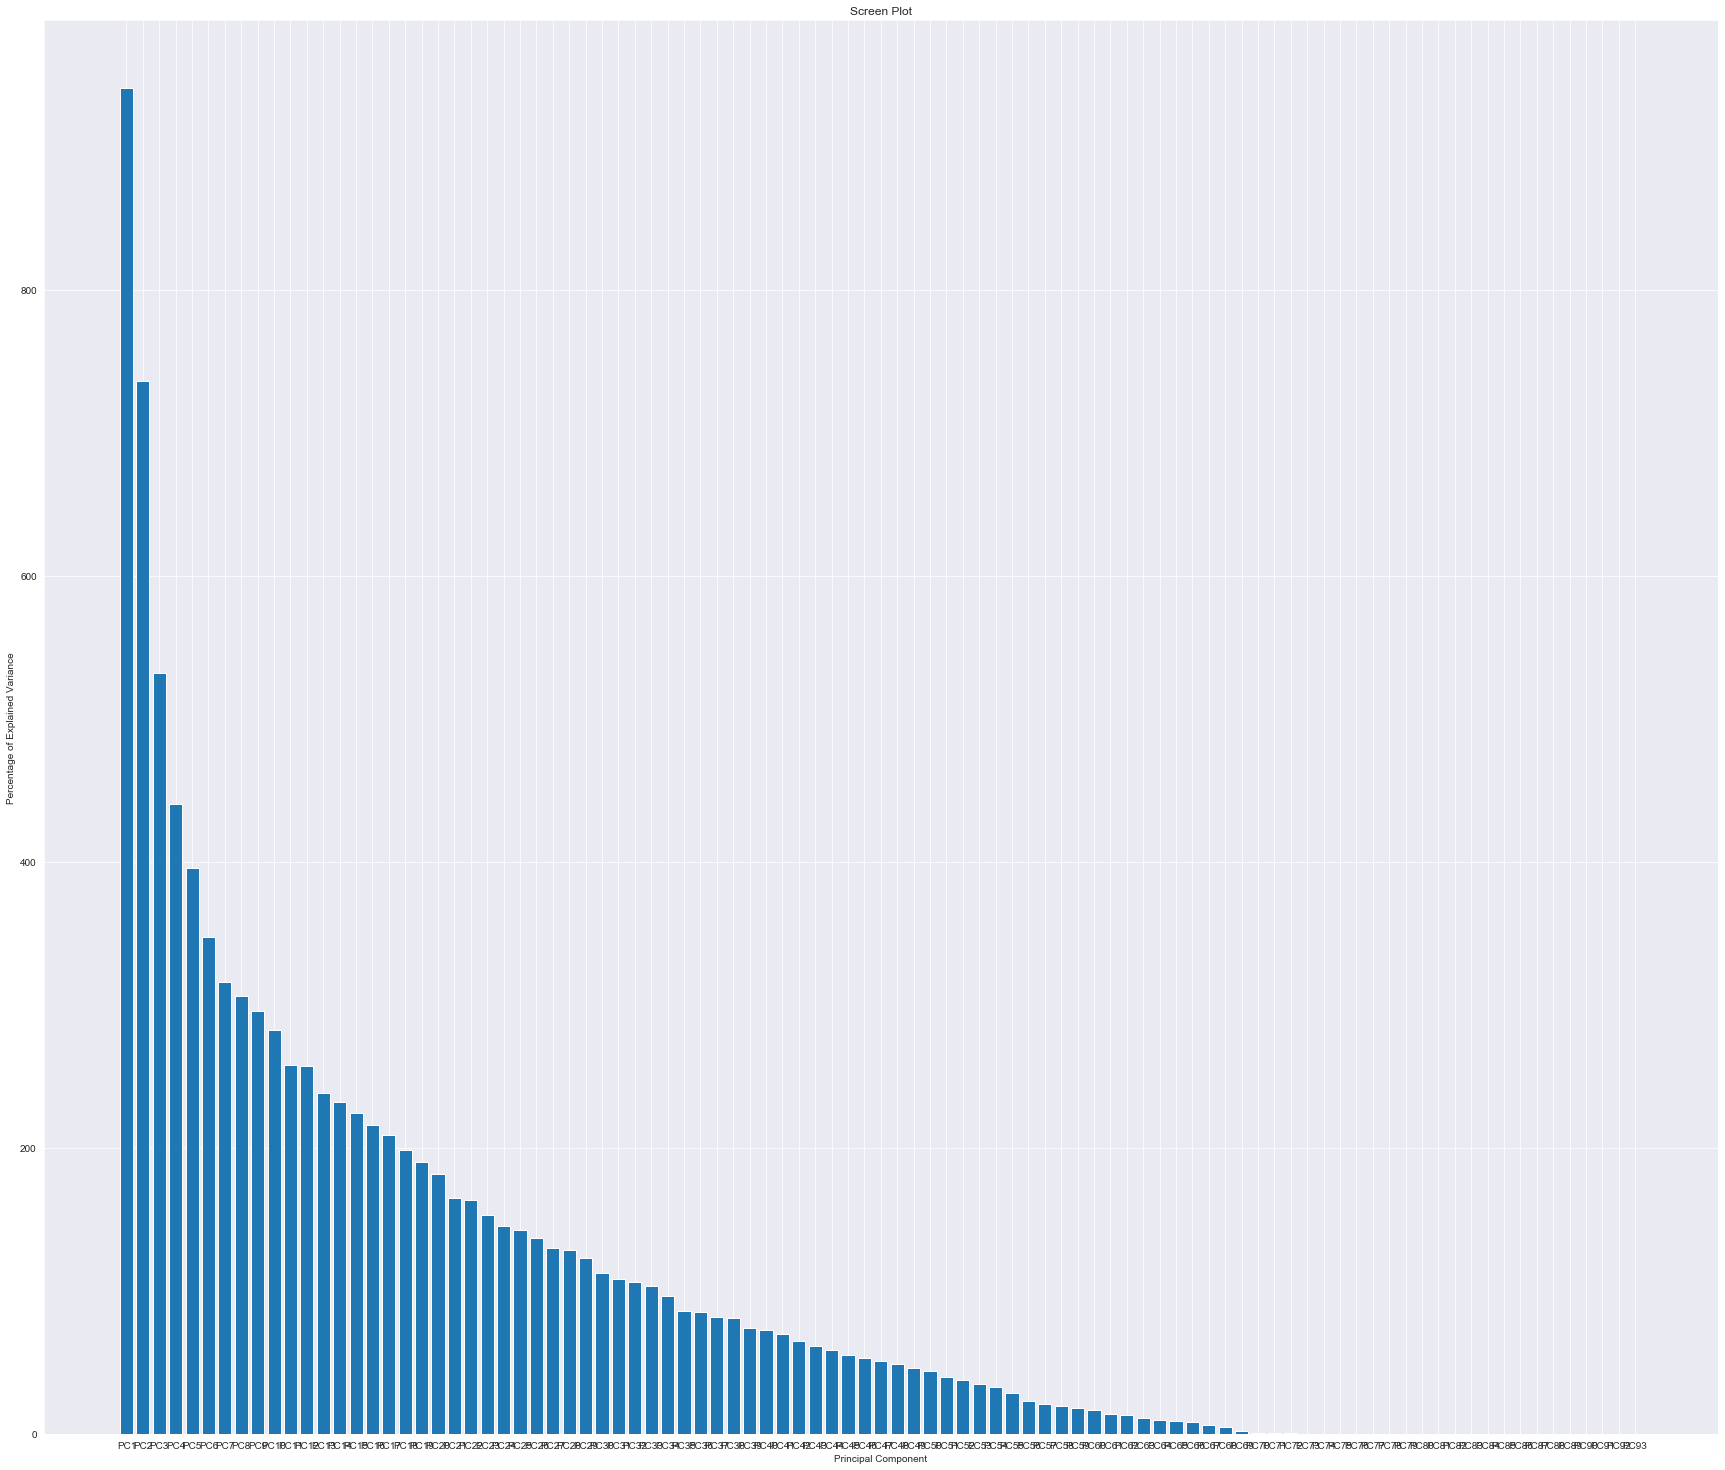

In [113]:
per_var=np.round(pca.explained_variance_ratio_*10000,decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
f, ax = plt.subplots(figsize=(30,26)) 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Screen Plot')
plt.show()

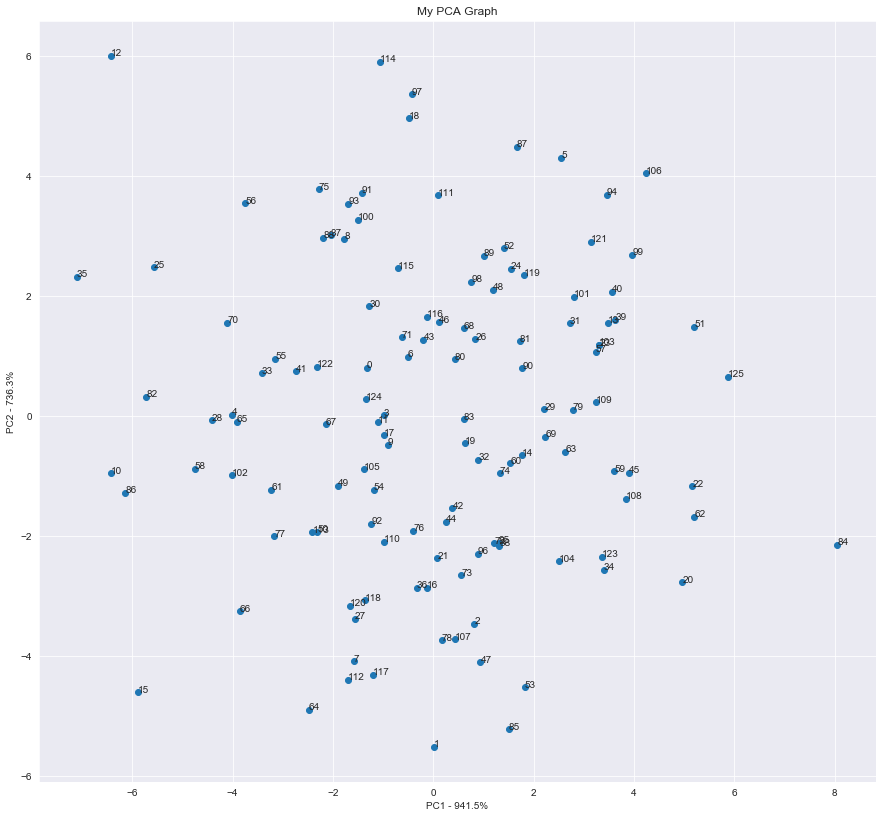

In [114]:
pca_df = pd.DataFrame(pca_data, columns=labels)
f, ax = plt.subplots(figsize=(15,14))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

In [115]:
loading_scores=pd.Series(pca.components_[0],index=x_train.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_25_features=sorted_loading_scores[0:25].index.values
print(top_25_features)

['Vehicle_Collision_Coverage_Deductible_negative1s'
 'Vehicle_Collision_Coverage_Indicator_Y_1s'
 'Vehicle_Collision_Coverage_Indicator_N_1s'
 'EEA_Liability_Coverage_Only_Indicator_N_1s' 'Vehicle_Age_In_Years_mean'
 'Annual_Premium_mean' 'EEA_Packaged_Policy_Indicator_N_1s'
 'Vehicle_Youthful_Driver_Indicator_N_1s'
 'Vehicle_Youthful_Driver_Indicator_Y_1s' 'Vehicle_Passive_Restraint_Y_1s'
 'Vehicle_Passive_Restraint_N_1s'
 'Vehicle_Anti_Theft_Device_Not_Applicable_1s' 'Driver_Total_Single_mean'
 'Vehicle_Youthful_Driver_Training_Code_Without_Driver_Training_1s'
 'Driver_Total_Teenager_Age_15_19_1s'
 'Driver_Total_Teenager_Age_15_19_mean'
 'Vehicle_Anti_Theft_Device_Passive_Disabling-Vehicle_Recovery_1s'
 'Driver_Total_Married_mean' 'Driver_Total_Related_To_Insured_Child_mean'
 'SYS_New_Business_N_1s' 'SYS_New_Business_Y_1s'
 'Driver_Total_Related_To_Insured_Spouse_mean'
 'Vehicle_Youthful_Good_Student_Code_Eligible_for_Good_Student_Credit_1s'
 'Vehicle_Performance_High_1s' 'Driver_Tot

In [662]:
#Dropped those features that are not important as per PCA
x_train = pd.read_csv('D:\\x_train.csv')
y_train = x_train['Log_Loss_Ratio'].copy()

x_train.replace('{}', 0, inplace=True)

x_train=x_train.drop(['index','Log_Loss_Ratio','Vehicle_New_Cost_Amount_negative1s', 'Vehicle_New_Cost_Amount_mean', 'Vehicle_Symbol_mean', 'Vehicle_Miles_To_Work_negative1s', 
              'Vehicle_Miles_To_Work_mean', 'Vehicle_Med_Pay_Limit_negative1s', 'Vehicle_Med_Pay_Limit_mean', 
              'Vehicle_Physical_Damage_Limit_negative1s', 'Vehicle_Physical_Damage_Limit_mean', 'Vehicle_Comprehensive_Coverage_Limit_negative1s', 
              'Vehicle_Comprehensive_Coverage_Limit_mean',  'Vehicle_Collision_Coverage_Deductible_mean', 
              'Driver_Minimum_Age_mean',  
              'Vehicle_Driver_Points_mean', 'Vehicle_Usage_Business_1s',
              'Vehicle_Usage_Farm_1s', 
              'Vehicle_Usage_Pleasure_1s', 
              'Vehicle_Usage_Work_1s', 
              'Vehicle_Anti_Theft_Device_Active_Disabling_1s', 
              'Vehicle_Anti_Theft_Device_Alarm_Only_1s', 
               
               
              'Vehicle_Anti_Theft_Device_Unknown_1s', 
               
              'Vehicle_Passive_Restraint_Unknown_1s', 
               
              'Vehicle_Bodily_Injury_Limit_100-300_1s', 
              'Vehicle_Bodily_Injury_Limit_100-500_1s','Vehicle_Bodily_Injury_Limit_1M-1M_1s', 
              'Vehicle_Bodily_Injury_Limit_25-50_1s', 'Vehicle_Bodily_Injury_Limit_250-500_1s', 
              'Vehicle_Bodily_Injury_Limit_300-500_1s', 
              'Vehicle_Bodily_Injury_Limit_50-100 _1s','Vehicle_Bodily_Injury_Limit_500-500_1s', 
               
         
              'Vehicle_Safe_Driver_Discount_Indicator_N_1s',
              'Vehicle_Safe_Driver_Discount_Indicator_Y_1s',      
                'SYS_Renewed_Y_1s',
                'SYS_Renewed_N_1s',
                 'Policy_Method_Of_Payment_Pre-paid_1s',
              'EEA_Policy_Tenure_mean',
             
               'Vehicle_Number_Of_Drivers_Assigned_mean',
               'Policy_Company_Standard_1s',
                'Policy_Company_Preferred_1s'
             ,'Policy_Installment_Term','Vehicle_Territory_mode',
              'Driver_Total_mean',
              'Driver_Total_Male_mean','Driver_Total_Female_mean',
                
             'Driver_Total_Related_To_Insured_Self_mean',
              
               
               'Driver_Total_Young_Adult_Ages_24_29_mean'
              ,'Driver_Total_Low_Middle_Adult_Ages_30_39_mean','Driver_Total_Middle_Adult_Ages_40_49_mean','Driver_Total_Adult_Ages_50_64_mean','Driver_Total_Senior_Ages_65_69_mean',
              'Driver_Total_Upper_Senior_Ages_70_plus_mean','Policy_Billing_Code_Direct_Billed_to_Insured_1s',
              'Policy_Method_Of_Payment_Installment_1s',
              'Policy_Reinstatement_Fee_Indicator_N_1s',
             'Vehicle_Performance_Intermediate_1s','Vehicle_Performance_Sports_1s','Vehicle_Performance_Sports_Premium_1s','Vehicle_Performance__Standard_1s',
             'Vehicle_Youthful_Driver_Training_Code_With_Driver_Training_1s','Vehicle_Youthful_Driver_Training_Code_With_or_Without_Driver_Training_1s',
            'EEA_Multi_Auto_Policies_Indicator_N_1s',
                'EEA_Agency_Type_Hybrid_1s',
             'EEA_Agency_Type_Non-standard_1s','EEA_Agency_Type_Preferred_1s','EEA_Agency_Type_Standard_1s','Vehicle_Days_Per_Week_Driven_mean'],axis=1)
x_train=x_train.round(3)

In [663]:
mypath = 'D:\\2020_Spring_testing_portfolios\\'
portfolios = [f for f in listdir(mypath) if isfile(join(mypath, f))]
portfolios = [folio.replace('test_', '') for folio in portfolios]
portfolios = [folio.replace('.csv', '') for folio in portfolios]

test_data = pd.read_csv('D:\\x_test.csv')

test_data=test_data.drop(['index','Vehicle_New_Cost_Amount_negative1s', 'Vehicle_New_Cost_Amount_mean', 'Vehicle_Symbol_mean', 'Vehicle_Miles_To_Work_negative1s', 
              'Vehicle_Miles_To_Work_mean', 'Vehicle_Med_Pay_Limit_negative1s', 'Vehicle_Med_Pay_Limit_mean', 
              'Vehicle_Physical_Damage_Limit_negative1s', 'Vehicle_Physical_Damage_Limit_mean', 'Vehicle_Comprehensive_Coverage_Limit_negative1s', 
              'Vehicle_Comprehensive_Coverage_Limit_mean',  'Vehicle_Collision_Coverage_Deductible_mean', 
              'Driver_Minimum_Age_mean',  
              'Vehicle_Driver_Points_mean', 'Vehicle_Usage_Business_1s',
              'Vehicle_Usage_Farm_1s', 
              'Vehicle_Usage_Pleasure_1s', 
              'Vehicle_Usage_Work_1s', 
              'Vehicle_Anti_Theft_Device_Active_Disabling_1s', 
              'Vehicle_Anti_Theft_Device_Alarm_Only_1s', 
               
               
              'Vehicle_Anti_Theft_Device_Unknown_1s', 
               
              'Vehicle_Passive_Restraint_Unknown_1s', 
               
              'Vehicle_Bodily_Injury_Limit_100-300_1s', 
              'Vehicle_Bodily_Injury_Limit_100-500_1s','Vehicle_Bodily_Injury_Limit_1M-1M_1s', 
              'Vehicle_Bodily_Injury_Limit_25-50_1s', 'Vehicle_Bodily_Injury_Limit_250-500_1s', 
              'Vehicle_Bodily_Injury_Limit_300-500_1s', 
              'Vehicle_Bodily_Injury_Limit_50-100 _1s','Vehicle_Bodily_Injury_Limit_500-500_1s', 
               
         
              'Vehicle_Safe_Driver_Discount_Indicator_N_1s',
              'Vehicle_Safe_Driver_Discount_Indicator_Y_1s',      
                'SYS_Renewed_Y_1s',
                'SYS_Renewed_N_1s',
                 'Policy_Method_Of_Payment_Pre-paid_1s',
              'EEA_Policy_Tenure_mean',
             
               'Vehicle_Number_Of_Drivers_Assigned_mean',
               'Policy_Company_Standard_1s',
                'Policy_Company_Preferred_1s'
             ,'Policy_Installment_Term','Vehicle_Territory_mode',
              'Driver_Total_mean',
              'Driver_Total_Male_mean','Driver_Total_Female_mean',
                
             'Driver_Total_Related_To_Insured_Self_mean',
              
               
               'Driver_Total_Young_Adult_Ages_24_29_mean'
              ,'Driver_Total_Low_Middle_Adult_Ages_30_39_mean','Driver_Total_Middle_Adult_Ages_40_49_mean','Driver_Total_Adult_Ages_50_64_mean','Driver_Total_Senior_Ages_65_69_mean',
              'Driver_Total_Upper_Senior_Ages_70_plus_mean','Policy_Billing_Code_Direct_Billed_to_Insured_1s',
              'Policy_Method_Of_Payment_Installment_1s',
              'Policy_Reinstatement_Fee_Indicator_N_1s',
             'Vehicle_Performance_Intermediate_1s','Vehicle_Performance_Sports_1s','Vehicle_Performance_Sports_Premium_1s','Vehicle_Performance__Standard_1s',
             'Vehicle_Youthful_Driver_Training_Code_With_Driver_Training_1s','Vehicle_Youthful_Driver_Training_Code_With_or_Without_Driver_Training_1s',
            'EEA_Multi_Auto_Policies_Indicator_N_1s',
                'EEA_Agency_Type_Hybrid_1s',
             'EEA_Agency_Type_Non-standard_1s','EEA_Agency_Type_Preferred_1s','EEA_Agency_Type_Standard_1s','Vehicle_Days_Per_Week_Driven_mean'],axis=1)

In [664]:
test_data.replace('{}', 0, inplace=True)

test_data=test_data.round(3)

In [665]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, random_state=45)

In [666]:
print('dim(X_train) = ', X_train.shape)
print('dim(Y_train) = ', Y_train.shape)
print('dim(X_test) = ', X_test.shape)
print('dim(Y_test) = ', Y_test.shape)
print('dim(test_data) = ', test_data.shape)

dim(X_train) =  (94, 27)
dim(Y_train) =  (94,)
dim(X_test) =  (32, 27)
dim(Y_test) =  (32,)
dim(test_data) =  (330, 27)


In [667]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

test_data_scaled=scaler.transform(test_data)

In [668]:
alphas = np.linspace(1.0, 2000, num=100)

In [669]:
l2_cv = RidgeCV(alphas=alphas,cv=None, store_cv_values=True)
l2_cv.fit(X_train_scaled, Y_train)
pred_train = l2_cv.predict(X_train_scaled)
pred_test = l2_cv.predict(X_test_scaled)
mae = mean_absolute_error(Y_train, pred_train)
print('Ridge: alpha = ', l2_cv.alpha_) 
print('Ridge: coef = ', l2_cv.coef_)
print('Ridge: R2 on test = ', l2_cv.score(X_test_scaled,Y_test))
print('Ridge: R2 on train= ', l2_cv.score(X_train_scaled,Y_train))
print('Ridge: MAE on Train is {}'.format(mae))
print('Ridge: MAE on Test is {}'.format(mean_absolute_error(Y_test, pred_test)))
#print(np.log(pred_train))
print(np.log(pred_test))

Ridge: alpha =  2000.0
Ridge: coef =  [-1.22341704e-04 -1.76849725e-04 -2.00211095e-05 -1.12936300e-05
  2.78432182e-04  1.22298108e-03 -1.05306320e-04  3.64612442e-04
  4.69650846e-04  3.55408463e-04  4.38710412e-04 -5.78797943e-04
  5.78797943e-04 -6.50958367e-05  5.47368551e-04 -2.92871661e-04
 -1.07292459e-05 -1.07292459e-05  1.07292459e-05 -8.61559215e-05
  7.81169944e-05  1.49768596e-04  4.04167178e-04  8.46415004e-05
 -8.46415004e-05  2.82374725e-04 -1.48421694e-03]
Ridge: R2 on test =  0.0039419929975187395
Ridge: R2 on train=  0.012709014945799346
Ridge: MAE on Train is 0.10952894018089941
Ridge: MAE on Test is 0.15044471899350792
[-0.26664854 -0.26741791 -0.26157973 -0.26392229 -0.26210314 -0.26391453
 -0.26369191 -0.26738239 -0.2659646  -0.25764646 -0.26216628 -0.260779
 -0.26350692 -0.26190657 -0.25812584 -0.26083194 -0.26553311 -0.26214178
 -0.26206964 -0.26111425 -0.26163187 -0.26224138 -0.26328812 -0.25965652
 -0.26488251 -0.26454199 -0.25615345 -0.26115378 -0.25893544 -

In [670]:
l1 = LassoCV(alphas=alphas,cv=None)
l1.fit(X_train_scaled, Y_train)
pred_lasso_train=l1.predict(X_train_scaled)
pred_lasso_test=l1.predict(X_test_scaled)
mae = mean_absolute_error(Y_train, pred_lasso_train)
print('Lasso: coef = ', l1.coef_)
print('alpha = ', l1.alpha_) 
print('Lasso: R2 on Test = ', l1.score(X_test_scaled,Y_test))
print('Lasso: RMSE on Test =', np.sqrt(mean_squared_error(Y_test,pred_lasso_test)))
print('Lasso: R2 on Train = ', l1.score(X_train_scaled,Y_train))
print('Lasso: RMSE on Train =', np.sqrt(mean_squared_error(Y_train,pred_lasso_train)))
print('Lasso: MAE on Train is {}'.format(mae))
print('Lasso: MAE on Test is {}'.format(mean_absolute_error(Y_test, pred_lasso_test)))
print(np.log(pred_lasso_test))

Lasso: coef =  [-0. -0. -0.  0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0. -0.  0.  0.
 -0. -0.  0.  0.  0.  0. -0.  0. -0.]
alpha =  2000.0
Lasso: R2 on Test =  -0.0013581824271309273
Lasso: RMSE on Test = 0.1791357481040128
Lasso: R2 on Train =  0.0
Lasso: RMSE on Train = 0.14188117910271822
Lasso: MAE on Train is 0.11031803413895151
Lasso: MAE on Test is 0.15118570187323468
[-0.26144313 -0.26144313 -0.26144313 -0.26144313 -0.26144313 -0.26144313
 -0.26144313 -0.26144313 -0.26144313 -0.26144313 -0.26144313 -0.26144313
 -0.26144313 -0.26144313 -0.26144313 -0.26144313 -0.26144313 -0.26144313
 -0.26144313 -0.26144313 -0.26144313 -0.26144313 -0.26144313 -0.26144313
 -0.26144313 -0.26144313 -0.26144313 -0.26144313 -0.26144313 -0.26144313
 -0.26144313 -0.26144313]


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [671]:
# create a linear model with intercept
ols = linear_model.LinearRegression()

# traing the linear model using traning data
ols.fit(X_train_scaled, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [676]:
Y_train_predict = ols.predict(X_train_scaled)
rmse = (np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
mae = mean_absolute_error(Y_train, Y_train_predict)
r2 = r2_score(Y_train, Y_train_predict)

print("Model performance for the training set - OLS")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MAE is {}'.format(mae))
print('R2 score is {}'.format(r2))
print("\n")
#print(np.log(Y_train_predict))
#print("\n")

Y_test_predict = ols.predict(X_test_scaled)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
mae = mean_absolute_error(Y_test, Y_test_predict)

# r-squared score of the model
r2 = r2_score(Y_test, Y_test_predict)

print("The model performance for testing set - OLS")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MAE is {}'.format(mae))
print('R2 score is {}'.format(r2))
print("\n")
print(np.log(Y_test_predict))


Model performance for the training set - OLS
--------------------------------------
RMSE is 0.1398890787817027
MAE is 0.10940890573246631
R2 score is 0.027884109330188367


The model performance for testing set - OLS
--------------------------------------
RMSE is 0.20557250102996055
MAE is 0.16485214646104757
R2 score is -0.31872720799254095


[-0.26263977 -0.33945718 -0.29886675 -0.22056789 -0.28949067 -0.26183108
 -0.34328766 -0.38926828 -0.53160316 -0.20723843 -0.34817519 -0.21014093
 -0.12356996 -0.51840425 -0.15498471 -0.28308711 -0.09640537 -0.12103594
 -0.17581034 -0.20485929 -0.00101865 -0.28342589 -0.24278613 -0.10337525
 -0.29009454 -0.45530954 -0.27254803 -0.11814815 -0.30044845 -0.35981887
 -0.53247837 -0.34892379]


In [677]:
Y_train_predict = l2_cv.predict(X_train_scaled)
rmse = (np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
mae = mean_absolute_error(Y_train, Y_train_predict)
r2 = r2_score(Y_train, Y_train_predict)

print("Model performance for the training set - Ridge Regression")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MAE is {}'.format(mae))
print('R2 score is {}'.format(r2))
#print(np.log(Y_train_predict))
print("\n")

Y_test_predict = l2_cv.predict(X_test_scaled)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
mae = mean_absolute_error(Y_test, Y_test_predict)

# r-squared score of the model
r2 = r2_score(Y_test, Y_test_predict)

print("The model performance for testing set - Ridge Regression")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MAE is {}'.format(mae))
print('R2 score is {}'.format(r2))
print("\n")
print(np.log(Y_test_predict))

Model performance for the training set - Ridge Regression
--------------------------------------
RMSE is 0.14097671117671298
MAE is 0.10952894018089941
R2 score is 0.012709014945799346


The model performance for testing set - Ridge Regression
--------------------------------------
RMSE is 0.17866103755580492
MAE is 0.15044471899350792
R2 score is 0.0039419929975187395


[-0.26664854 -0.26741791 -0.26157973 -0.26392229 -0.26210314 -0.26391453
 -0.26369191 -0.26738239 -0.2659646  -0.25764646 -0.26216628 -0.260779
 -0.26350692 -0.26190657 -0.25812584 -0.26083194 -0.26553311 -0.26214178
 -0.26206964 -0.26111425 -0.26163187 -0.26224138 -0.26328812 -0.25965652
 -0.26488251 -0.26454199 -0.25615345 -0.26115378 -0.25893544 -0.26289155
 -0.26351909 -0.2620521 ]


In [678]:
#Ridge model predictions
predictions = l2_cv.predict(test_data_scaled)
final_values=np.log(predictions.round(5))
data = {'ID': portfolios, 'ln_LR': final_values}
df_new = pd.DataFrame(data)
print((np.log(predictions.round(5))))
print("\n")
#excel_exported = df_new.to_csv (r'ln_lr.csv', index = None, header=True)

[-0.26295044 -0.26317159 -0.26295044 -0.2675919  -0.26579013 -0.25877073
 -0.25710114 -0.26159856 -0.25496967 -0.26686036 -0.25181312 -0.25991128
 -0.25609297 -0.26005394 -0.2616765  -0.2723338  -0.25944453 -0.25965195
 -0.25776088 -0.26876873 -0.25869301 -0.26327568 -0.25733394 -0.26265131
 -0.2542473  -0.26418692 -0.26341882 -0.2588355  -0.25931492 -0.26573795
 -0.27203185 -0.2621053  -0.26157258 -0.24975707 -0.2550342  -0.26918749
 -0.26821937 -0.26078052 -0.26757884 -0.25717873 -0.26447349 -0.26453863
 -0.257321   -0.25471162 -0.26576404 -0.26426507 -0.27027447 -0.26627289
 -0.26314557 -0.25645476 -0.26271633 -0.26133879 -0.26500776 -0.26055989
 -0.26581622 -0.25801972 -0.26584231 -0.26649478 -0.26235226 -0.26076754
 -0.26735671 -0.26296344 -0.26146867 -0.26202732 -0.26279436 -0.26418692
 -0.25791617 -0.26032634 -0.26576404 -0.259289   -0.26569882 -0.26217028
 -0.26939694 -0.26178043 -0.26114401 -0.26096225 -0.25884845 -0.26550319
 -0.26304149 -0.26202732 -0.2616765  -0.26409576 -0

In [679]:
#Linear model is considered in generating the results
ols_predictions = ols.predict(test_data_scaled)
final_values=np.log(ols_predictions.round(5))
data = {'ID': portfolios, 'ln_LR': final_values}
df_new = pd.DataFrame(data)
print((np.log(ols_predictions.round(5))))
print("\n")
excel_exported = df_new.to_csv (r'ln_lr.csv', index = None, header=True)

[-0.34815421 -0.36022409 -0.10549386 -0.25984644 -1.10545565 -0.44494425
  0.01195821 -0.2553956   0.17559062 -0.26678201 -0.05549157 -0.46539029
 -0.26171547 -0.2389681  -0.35667494 -0.652178   -0.02374981 -0.16817016
 -0.30557453 -0.1331429  -0.11427794 -0.51214316 -0.24606679 -0.24212252
 -0.32125264 -0.2199362  -0.15722707 -0.11255299 -0.29968718 -0.42978342
 -0.34767273 -0.28294664 -0.24573431 -0.22997936 -0.38274028 -0.19618521
 -0.2295138   0.00572359 -0.24196966 -0.38274028 -0.32686652  0.01124652
 -0.17846899 -0.17021909 -0.330687   -0.33841412 -0.86633458 -0.26622069
 -0.24596448 -0.50861141 -0.26648173 -0.10449422 -0.40271888 -0.72753161
 -0.3831656   0.03768107 -0.50413141 -0.23525409 -0.37360313 -0.21961229
 -0.64662626 -0.43641413 -0.43687838 -0.32002622 -0.22325606 -0.32811525
 -0.26135178 -0.23766092 -0.34887686 -0.28456693 -0.34019717 -0.20611437
 -0.5773038  -0.15573026 -0.12366027 -0.24321872 -0.17294961 -0.53629729
 -0.37469345 -0.18963624 -0.23200772 -0.56762528 -0

In [ ]:
#below code is for trail and error practice

In [52]:
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.impute import MissingIndicator

In [53]:
ols_full = linear_model.LinearRegression(fit_intercept=True)
ols_full.fit(Portfolio_1, y_train)

print('RMSE - full = ', np.sqrt(mean_squared_error(y_test_portfolio_1, ols_full.predict(x_test_portfolio_1))))

RMSE - full =  2197.789205305856


In [54]:
def test_imputations(my_strategy, my_fill_value, X_miss_train, X_miss_test, y_train, y_test):
    
    imp = SimpleImputer(missing_values=-1, strategy=my_strategy, fill_value=my_fill_value)
    imp.fit(X_miss_train)
    
    X_imp_train = imp.transform(X_miss_train)
    X_imp_test = imp.transform(X_miss_test)
    
    ols_miss = linear_model.LinearRegression(fit_intercept=True)
    ols_miss.fit(X_imp_train, y_train)
    print('RMSE - ', my_strategy, ' = ', np.sqrt(mean_squared_error(y_test, ols_miss.predict(X_imp_test))))  

In [55]:
test_imputations('mean', 0, Portfolio_1, x_test_portfolio_1, y_train, y_test_portfolio_1)
test_imputations('median', 0, Portfolio_1, x_test_portfolio_1, y_train, y_test_portfolio_1)
test_imputations('most_frequent', 0, Portfolio_1, x_test_portfolio_1, y_train, y_test_portfolio_1)
test_imputations('constant', 0, Portfolio_1, x_test_portfolio_1, y_train, y_test_portfolio_1)

RMSE -  mean  =  2197.789205305856
RMSE -  median  =  2197.789205305856
RMSE -  most_frequent  =  2197.789205305856
RMSE -  constant  =  2197.789205305856


In [184]:
x_train_data_sub= train_data.sample(2000)
x_train_data_sub.shape
y_train_data_sub=x_train_data_sub['Loss_Amount'].copy()
y_train_data_sub.shape

(2000,)

In [ ]:
df1.corr(method='pearson').unstack().sort_values()

In [ ]:
df1=train_data_with_loss.ix[samples[0,0]]
df1.shape

In [11]:
scaler = preprocessing.StandardScaler().fit(df1_scaled)
X_train_scaled = scaler.transform(df1_scaled)

In [3]:
portfolio_1 = pd.read_csv('D:\\2020_Spring_training_portfolios\\Portfolio_1.csv')
print(portfolio_1['Annual_Premium'].mean())
print(portfolio_1['Annual_Premium'].median())
print(portfolio_1['Annual_Premium'].mode()[0])
print(portfolio_1['Loss_Ratio'].mean())
print(np.log10(portfolio_1['Loss_Ratio'].mean()))
print(portfolio_1['Loss_Amount'].sum()/portfolio_1['Annual_Premium'].sum())
print(np.log10(portfolio_1['Loss_Amount'].sum()/portfolio_1['Annual_Premium'].sum()))


portfolio_25 = pd.read_csv('D:\\2020_Spring_training_portfolios\\Portfolio_25.csv')
print(portfolio_25['Loss_Amount'].mean())
print(portfolio_25['Loss_Amount'].median())
print(portfolio_25['Loss_Amount'].mode()[0])

df = pd.read_csv('D:\\2020_Spring_testing_portfolios\\test_portfolio_251.csv')
print(df['Vehicle_Territory'].mean())
print(df['Vehicle_Territory'].median())
print(df['Vehicle_Territory'].mode()[0])

328.014389999999
318.53
120.84
0.30750666666666665
-0.5121454643921055
0.274627108076976
-0.561256596352055
59.441320000000005
0.0
0.0
30.97326203208556
31.0
31


In [124]:
print(train_data['Annual_Premium'].mean())
print(train_data['Annual_Premium'].median())
print(train_data['Annual_Premium'].mode()[0])


print(train_data['Loss_Amount'].mean())
print(train_data['Loss_Amount'].median())
print(train_data['Loss_Amount'].mode()[0])

print(train_data['Loss_Ratio'].mean())
print(train_data['Loss_Ratio'].median())
print(train_data['Loss_Ratio'].mode()[0])

print(train_data['Policy_Installment_Term'].mean())
print(train_data['Policy_Installment_Term'].median())
print(train_data['Policy_Installment_Term'].mode()[0])


335.36046255852193
328.6
120.84
231.12585464466738
0.0
0.0
0.9750590921300034
0.0
0.0
5.886315742352864
3.5
0.0


In [25]:
print(train_data['Policy_Installment_Term'].mean())
print(train_data['Policy_Installment_Term'].median())
print(train_data['Policy_Installment_Term'].mode()[0])


6.224705599615477
6.0
6
